# **Bayesian Study of Sleep Disorder Diagnosis**

> ## Group Members: Rose Eluvathingal Muttikkal, Skye Jung, Grace Zhang
> ### Fall 2023
---





In [ ]:
import pymc as pm
from scipy.stats import bernoulli, beta, norm, uniform
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import scipy.stats as stats
import scipy
import os
import pandas as pd
import seaborn as sns
from scipy import special, stats
from google.colab import files
from google.colab import drive
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import RocCurveDisplay, accuracy_score, auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
az.style.use("arviz-darkgrid")
random_seed = 6040

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Importing the Data**

In [ ]:
# import dataset
sleep = pd.read_csv('sleep.csv')

sleep

Person_ID  Gender  Age            Occupation  Sleep_Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Sleep_Quality  Physical_Activity_Level  Stress_Level BMI_Category  \
0                6                       42             6   Overweight   
1                6                       60             8       Normal   
2                6                       60             8       Normal   
3                4                       30             8        Obese   
4                4                       30             8        Obese   
..             ...                      ...           ...          ...   
369              9                       75             3   Overweight   
370              9                       75             3   Overweight   
371              9                       75             3   Overweight   
372              9                       75             3   Overweight   
373              9                       75             3   Overweight   

    Blood_Pressure  Heart_Rate  Daily_Steps Sleep_Disorder  
0           126/83          77         4200           None  
1           125/80          75        10000           None  
2           125/80          75        10000           None  
3           140/90          85         3000    Sleep Apnea  
4           140/90          85         3000    Sleep Apnea  
..             ...         ...          ...            ...  
369         140/95          68         7000    Sleep Apnea  
370         140/95          68         7000    Sleep Apnea  
371         140/95          68         7000    Sleep Apnea  
372         140/95          68         7000    Sleep Apnea  
373         140/95          68         7000    Sleep Apnea  

[374 rows x 13 columns]

# **2. Exploring the Data**

### *To get to know about the `sleep` dataset, we performed performed exploratory data analysis (EDA). We displayed a review of the summary statistics for the data by checking the data type of each variable, categories under all categorical variables, and confirming no missing and NA values are present in the dataset.*


---


### *Lastly, two different types of visulization plots - pairplot and heatmap - were shown to help the audience get a better understanding of the correlations between variables.*

In [ ]:
# check data types
sleep.dtypes

Person_ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep_Duration             float64
Sleep_Quality                int64
Physical_Activity_Level      int64
Stress_Level                 int64
BMI_Category                object
Blood_Pressure              object
Heart_Rate                   int64
Daily_Steps                  int64
Sleep_Disorder              object
dtype: object

In [ ]:
# Gender count
sleep.Gender.value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [ ]:
# occupation count
sleep.Occupation.value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [ ]:
# BMI category count
sleep.BMI_Category.value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI_Category, dtype: int64

In [ ]:
# sleep disorder count
sleep.Sleep_Disorder.value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep_Disorder, dtype: int64

In [ ]:
# check missing values
pd.isnull(sleep).any()

Person_ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep_Duration             False
Sleep_Quality              False
Physical_Activity_Level    False
Stress_Level               False
BMI_Category               False
Blood_Pressure             False
Heart_Rate                 False
Daily_Steps                False
Sleep_Disorder             False
dtype: bool

In [ ]:
# check NA values
sleep.isna().any()

Person_ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep_Duration             False
Sleep_Quality              False
Physical_Activity_Level    False
Stress_Level               False
BMI_Category               False
Blood_Pressure             False
Heart_Rate                 False
Daily_Steps                False
Sleep_Disorder             False
dtype: bool

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


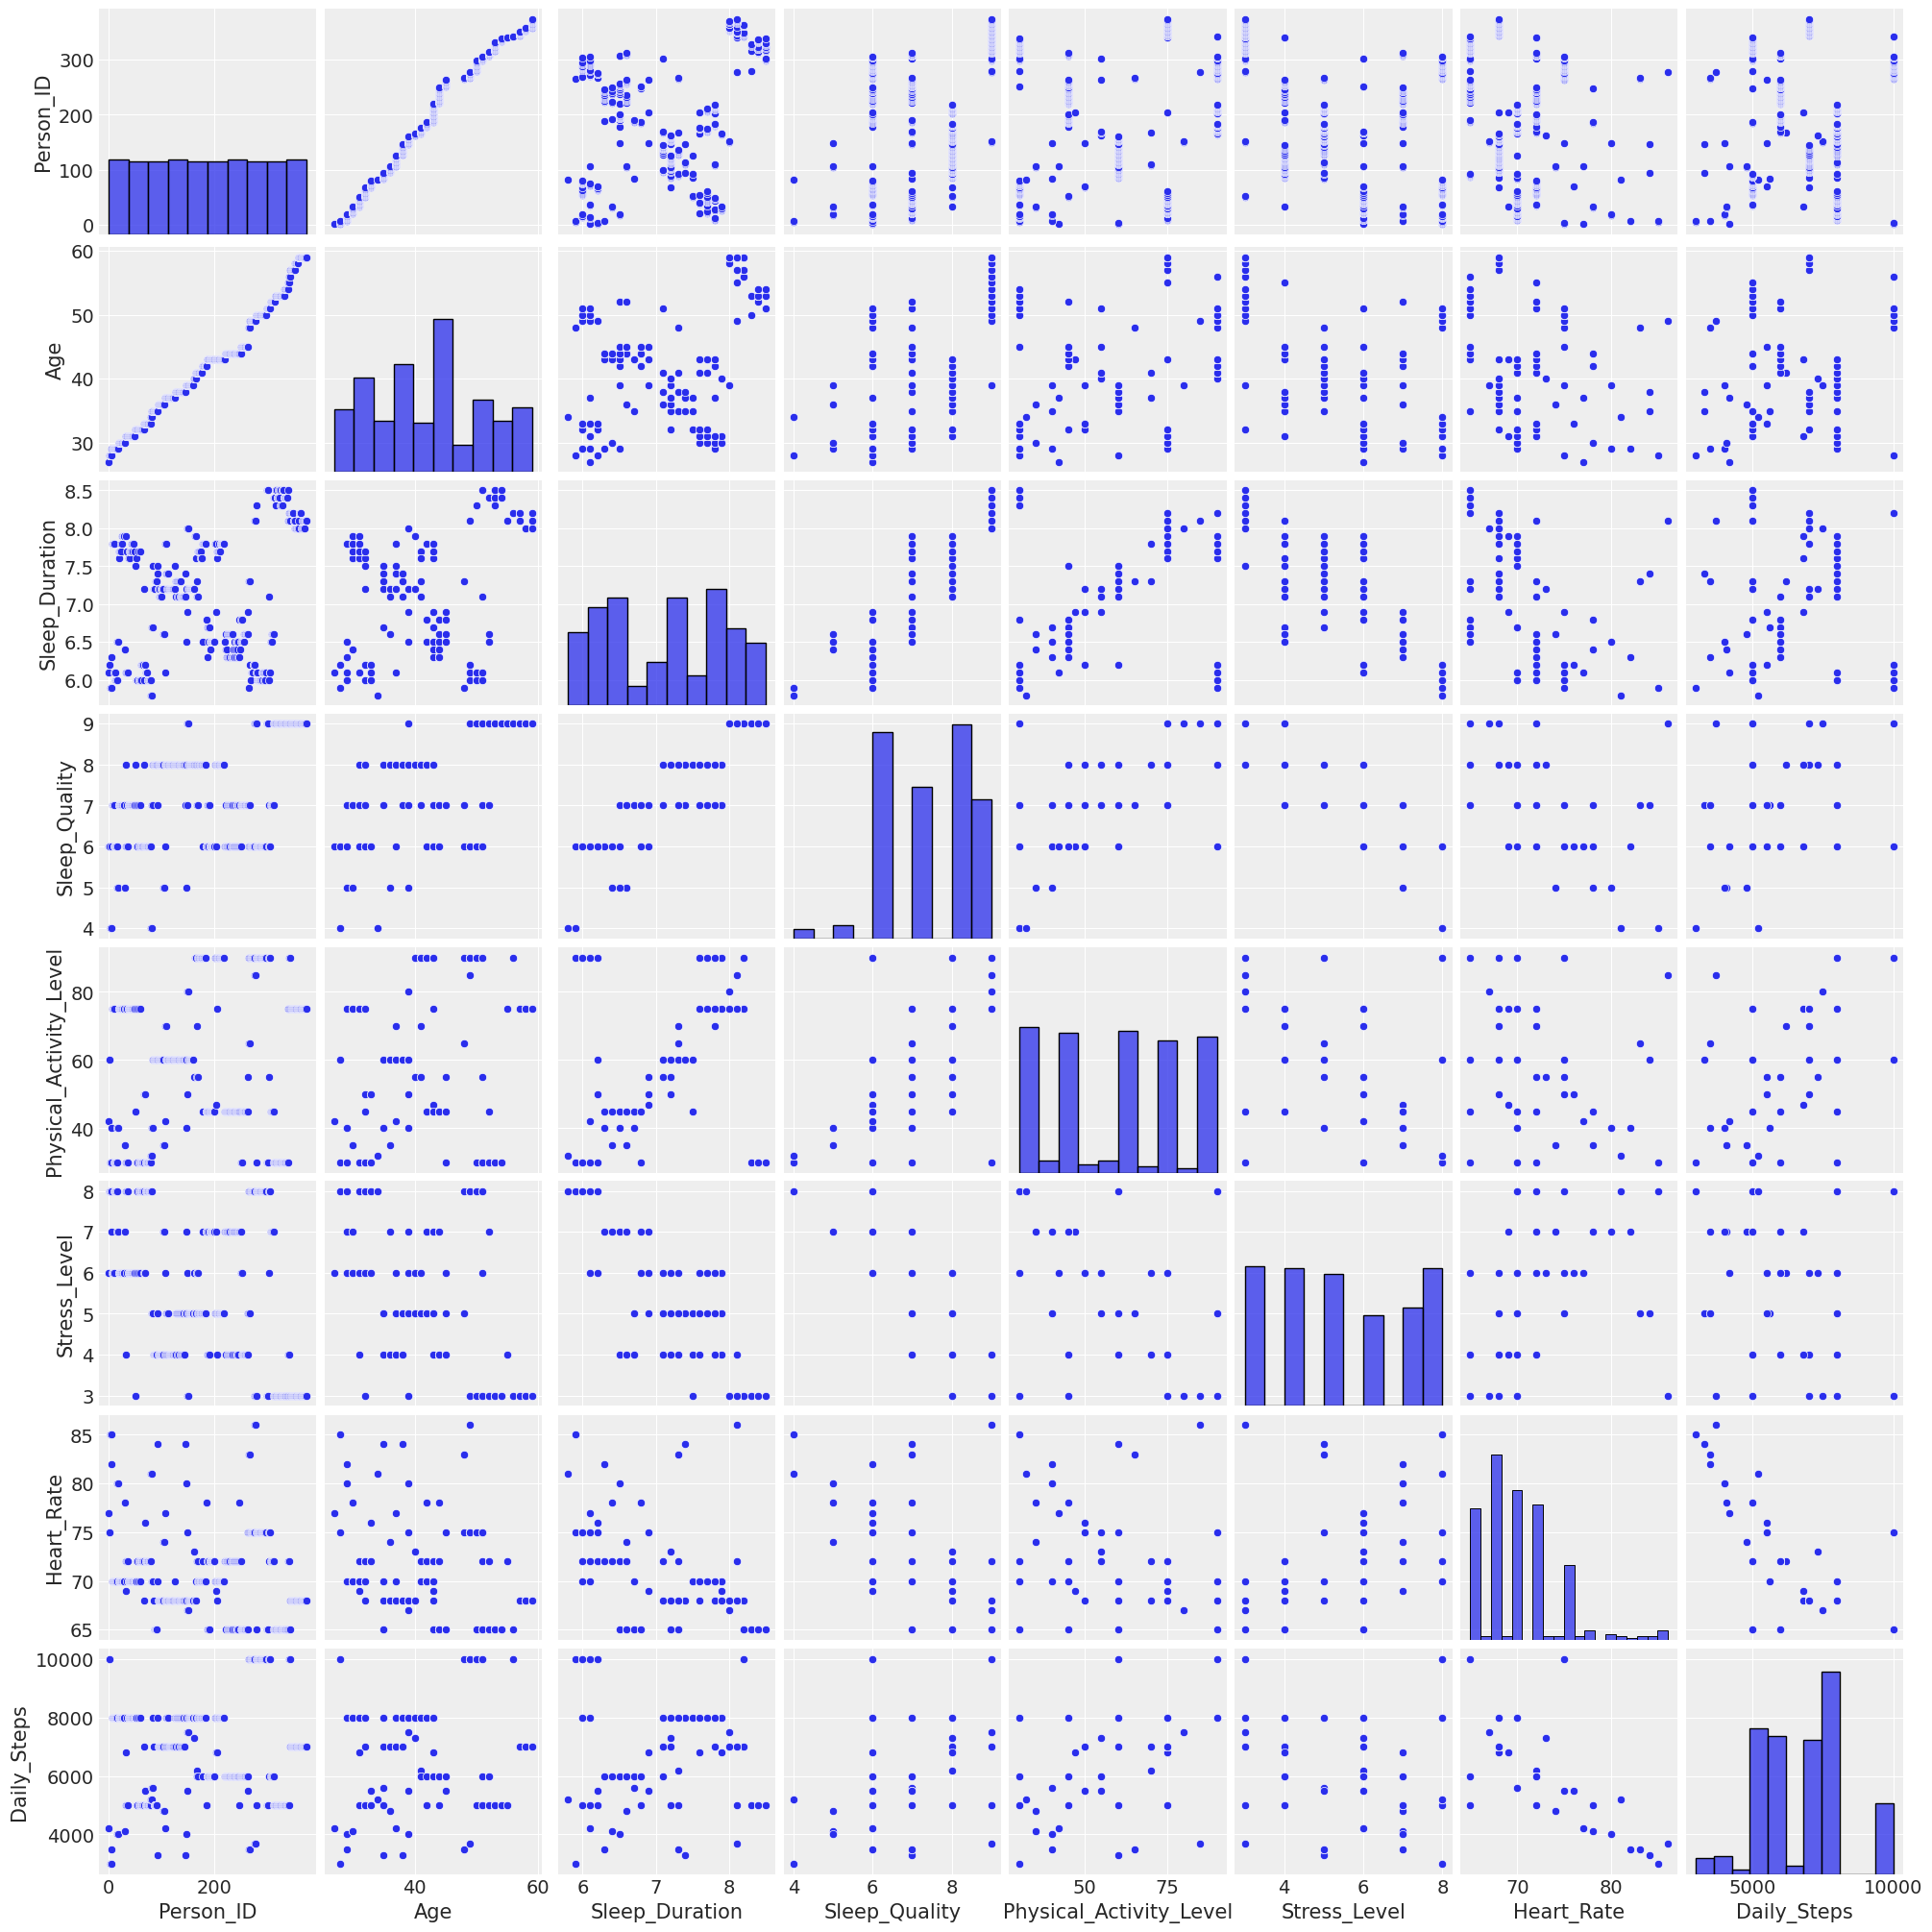

In [ ]:
# pairplot/correlation
sns.pairplot(sleep)

In [ ]:
# corrlation between variables
sleep.corr()

<ipython-input-14-0bc289b34fb8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sleep.corr()


Person_ID       Age  Sleep_Duration  Sleep_Quality  \
Person_ID                 1.000000  0.990516        0.296305       0.431612   
Age                       0.990516  1.000000        0.344709       0.473734   
Sleep_Duration            0.296305  0.344709        1.000000       0.883213   
Sleep_Quality             0.431612  0.473734        0.883213       1.000000   
Physical_Activity_Level   0.149882  0.178993        0.212360       0.192896   
Stress_Level             -0.394287 -0.422344       -0.811023      -0.898752   
Heart_Rate               -0.225467 -0.225606       -0.516455      -0.659865   
Daily_Steps               0.043844  0.057973       -0.039533       0.016791   

                         Physical_Activity_Level  Stress_Level  Heart_Rate  \
Person_ID                               0.149882     -0.394287   -0.225467   
Age                                     0.178993     -0.422344   -0.225606   
Sleep_Duration                          0.212360     -0.811023   -0.516455   
Sleep_Quality                           0.192896     -0.898752   -0.659865   
Physical_Activity_Level                 1.000000     -0.034134    0.136971   
Stress_Level                           -0.034134      1.000000    0.670026   
Heart_Rate                              0.136971      0.670026    1.000000   
Daily_Steps                             0.772723      0.186829   -0.030309   

                         Daily_Steps  
Person_ID                   0.043844  
Age                         0.057973  
Sleep_Duration             -0.039533  
Sleep_Quality               0.016791  
Physical_Activity_Level     0.772723  
Stress_Level                0.186829  
Heart_Rate                 -0.030309  
Daily_Steps                 1.000000

<ipython-input-15-6fcdf7b297b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sleep.corr()


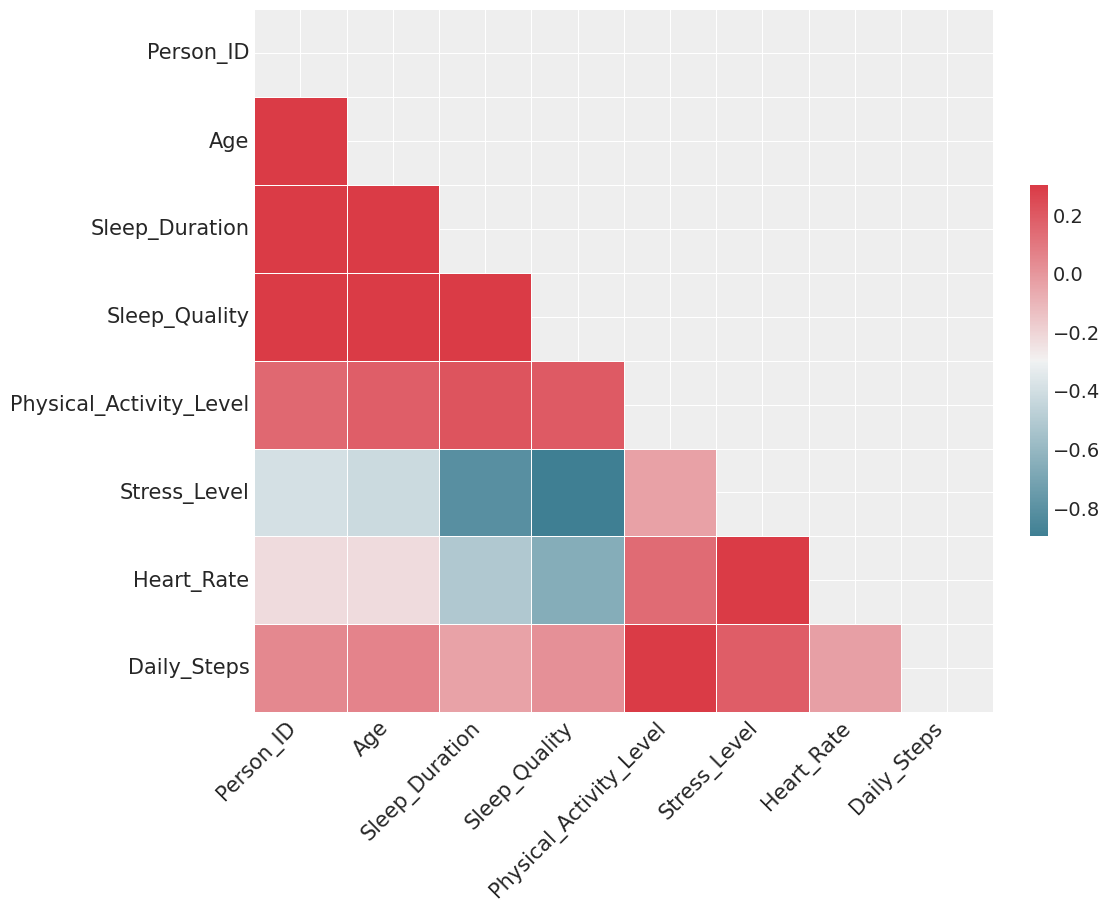

In [ ]:
# Compute the correlation matrix
corr = sleep.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(
corr,
mask=mask,
cmap=cmap,
vmax=0.3,
linewidths=0.5,
cbar_kws={"shrink": 0.5},
ax=ax,
);

# chagne degree and font size
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15)

plt.show()


# **3. Cleaning and Transforming the Data**

### *Before using variables to build Bayesian models, we first categorized  all object variables. Then, we used the method of z-scale to standardize all numeric variables so that they have same scales with a mean of 0 and a standard deviation of 1 and improve the convergence speed.*
---
### *We also categorized one of the numeric variables, `Blood_Pressure`, by splitting it into two categorical variables - `Systolic_BP` and `Diastolic_BP`. To have a better understanding of these two blood pressure categories, we re-defined blood pressure based on mmHg values and created a new variable called `BP_Category`, which comprises five blood pressure categories.*
### *Additionally, we converted the response variable, `Sleep_Disorder`, into a binary variable, where `1` indicates having sleep disorder and `0` indicates not having sleep disorder. Then, we cleaned the `BMI_Category` variable by replacing `Normal Weight` with `Normal` to make all elements have a consistent name.*
---
### *Then, we explored the proportions of each categorical variable by sleep disorder to validate that all those selected categorical variables could potentially have an effect on sleep disorder determination. To have a better visualization, the categories in each proportion plot was rearranged in a logical order.*
---
### *Next, we conducted one-hot coding for all four categorical predictors - `Gender`, `BMI_Category`, `BMI_Category`, `BP_Category`.*
---
### *After cleaned and sorted all variables, we updated the dataset and named it as `df`.*
---
### *Similarly, we created a boxplot distribution and found all the numeric variables are essential and necessary to be considered in the Main Effect Bayesian Model.*


In [ ]:
# convert object to category
for col in ['Gender', 'Occupation', 'BMI_Category', 'Blood_Pressure', 'Sleep_Disorder']:
    sleep[col] = sleep[col].astype('category')

In [ ]:
sleep.dtypes

Person_ID                     int64
Gender                     category
Age                           int64
Occupation                 category
Sleep_Duration              float64
Sleep_Quality                 int64
Physical_Activity_Level       int64
Stress_Level                  int64
BMI_Category               category
Blood_Pressure             category
Heart_Rate                    int64
Daily_Steps                   int64
Sleep_Disorder             category
dtype: object

In [ ]:
# Select numerical columns
numerical_columns = sleep.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns
sleep[numerical_columns] = scaler.fit_transform(sleep[numerical_columns])
sleep.head()

Person_ID Gender       Age            Occupation  Sleep_Duration  \
0  -1.727426   Male -1.753096     Software Engineer       -1.298887   
1  -1.718163   Male -1.637643                Doctor       -1.173036   
2  -1.708901   Male -1.637643                Doctor       -1.173036   
3  -1.699639   Male -1.637643  Sales Representative       -1.550588   
4  -1.690376   Male -1.637643  Sales Representative       -1.550588   

   Sleep_Quality  Physical_Activity_Level  Stress_Level BMI_Category  \
0      -1.098280                -0.825418      0.347021   Overweight   
1      -1.098280                 0.039844      1.475592       Normal   
2      -1.098280                 0.039844      1.475592       Normal   
3      -2.771424                -1.402260      1.475592        Obese   
4      -2.771424                -1.402260      1.475592        Obese   

  Blood_Pressure  Heart_Rate  Daily_Steps Sleep_Disorder  
0         126/83    1.654719    -1.619584           None  
1         125/80    1.170474     1.970077           None  
2         125/80    1.170474     1.970077           None  
3         140/90    3.591698    -2.362273    Sleep Apnea  
4         140/90    3.591698    -2.362273    Sleep Apnea

In [ ]:
# coding blood pressure as categorical variable
sleep[['Systolic_BP', 'Diastolic_BP']] = sleep['Blood_Pressure'].str.split('/', expand=True).astype(int)

# define conditions and corresponding categories
conditions = [
    (sleep['Systolic_BP'] < 120) & (sleep['Diastolic_BP'] < 80),
    (sleep['Systolic_BP'].between(120, 129)) & (sleep['Diastolic_BP'] < 80),
    (sleep['Systolic_BP'].between(130, 139)) | (sleep['Diastolic_BP'].between(80, 89)),
    (sleep['Systolic_BP'] >= 140) | (sleep['Diastolic_BP'] >= 90),
    (sleep['Systolic_BP'] >= 180) | (sleep['Diastolic_BP'] >= 120)
]

categories = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis']

# create a new column 'BP_Category' based on the conditions
sleep['BP_Category'] = np.select(conditions, categories)

# binary response of BP_Category
sleep['Sleep_Disorder'] = sleep['Sleep_Disorder'].map(lambda x: 0 if x == 'None' else 1) # 1: sleep disorder; 0: none

# clean and replace Normal Weight with Normal
sleep['BMI_Category'] = sleep['BMI_Category'].replace({'Normal Weight': 'Normal'})

sleep

Person_ID  Gender       Age            Occupation  Sleep_Duration  \
0    -1.727426    Male -1.753096     Software Engineer       -1.298887   
1    -1.718163    Male -1.637643                Doctor       -1.173036   
2    -1.708901    Male -1.637643                Doctor       -1.173036   
3    -1.699639    Male -1.637643  Sales Representative       -1.550588   
4    -1.690376    Male -1.637643  Sales Representative       -1.550588   
..         ...     ...       ...                   ...             ...   
369   1.690376  Female  1.941401                 Nurse        1.218127   
370   1.699639  Female  1.941401                 Nurse        1.092276   
371   1.708901  Female  1.941401                 Nurse        1.218127   
372   1.718163  Female  1.941401                 Nurse        1.218127   
373   1.727426  Female  1.941401                 Nurse        1.218127   

     Sleep_Quality  Physical_Activity_Level  Stress_Level BMI_Category  \
0        -1.098280                -0.825418      0.347021   Overweight   
1        -1.098280                 0.039844      1.475592       Normal   
2        -1.098280                 0.039844      1.475592       Normal   
3        -2.771424                -1.402260      1.475592        Obese   
4        -2.771424                -1.402260      1.475592        Obese   
..             ...                      ...           ...          ...   
369       1.411435                 0.760896     -1.345836   Overweight   
370       1.411435                 0.760896     -1.345836   Overweight   
371       1.411435                 0.760896     -1.345836   Overweight   
372       1.411435                 0.760896     -1.345836   Overweight   
373       1.411435                 0.760896     -1.345836   Overweight   

    Blood_Pressure  Heart_Rate  Daily_Steps  Sleep_Disorder  Systolic_BP  \
0           126/83    1.654719    -1.619584               0          126   
1           125/80    1.170474     1.970077               0          125   
2           125/80    1.170474     1.970077               0          125   
3           140/90    3.591698    -2.362273               1          140   
4           140/90    3.591698    -2.362273               1          140   
..             ...         ...          ...             ...          ...   
369         140/95   -0.524383     0.113356               1          140   
370         140/95   -0.524383     0.113356               1          140   
371         140/95   -0.524383     0.113356               1          140   
372         140/95   -0.524383     0.113356               1          140   
373         140/95   -0.524383     0.113356               1          140   

     Diastolic_BP           BP_Category  
0              83  Hypertension Stage 1  
1              80  Hypertension Stage 1  
2              80  Hypertension Stage 1  
3              90  Hypertension Stage 2  
4              90  Hypertension Stage 2  
..            ...                   ...  
369            95  Hypertension Stage 2  
370            95  Hypertension Stage 2  
371            95  Hypertension Stage 2  
372            95  Hypertension Stage 2  
373            95  Hypertension Stage 2  

[374 rows x 16 columns]

<ipython-input-78-c72fb9feabc5>:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjusts the plot layout


<Figure size 800x1000 with 0 Axes>

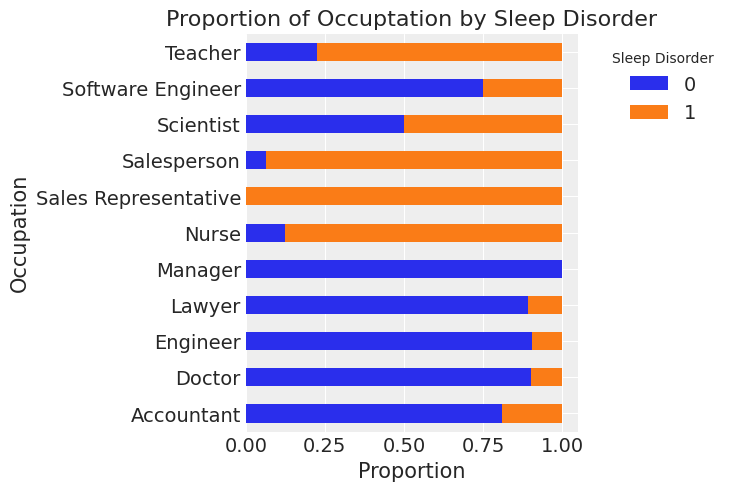

In [ ]:
# Normalize data to represent proportions
normalized_data = pd.crosstab(sleep['Occupation'], sleep['Sleep_Disorder'], normalize='index')

# Plotting normalized data as a horizontal stacked bar plot
plt.figure(figsize=(8, 10))  # Adjust the figure size as needed
normalized_data.plot(kind='barh', stacked=True)
plt.title('Proportion of Occuptation by Sleep Disorder')
plt.xlabel('Proportion')
plt.ylabel('Occupation')

# Adjusting legend position
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjusts the plot layout
plt.show()

<ipython-input-79-89b8cea8da09>:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjusts the plot layout


<Figure size 800x1000 with 0 Axes>

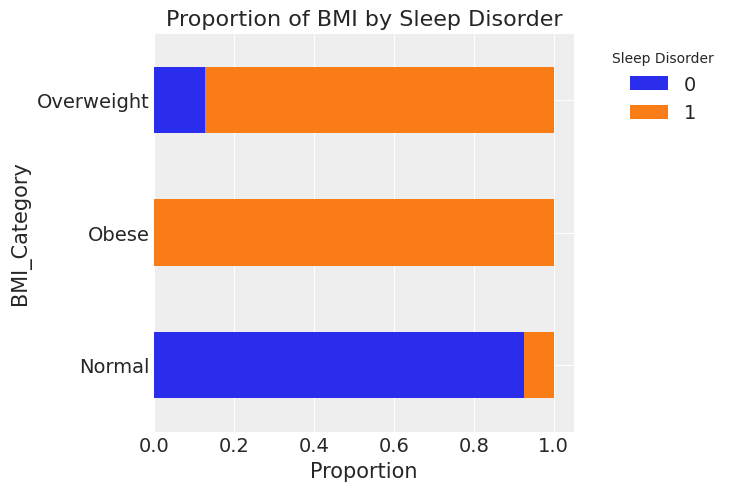

In [ ]:
# Normalize data to represent proportions
normalized_data = pd.crosstab(sleep['BMI_Category'], sleep['Sleep_Disorder'], normalize='index')

# Plotting normalized data as a horizontal stacked bar plot
plt.figure(figsize=(8, 10))  # Adjust the figure size as needed
normalized_data.plot(kind='barh', stacked=True)
plt.title('Proportion of BMI by Sleep Disorder')
plt.xlabel('Proportion')
#plt.ylabel('BMI')

# Adjusting legend position
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjusts the plot layout
plt.show()

<ipython-input-80-629b37355f79>:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjusts the plot layout


<Figure size 800x1000 with 0 Axes>

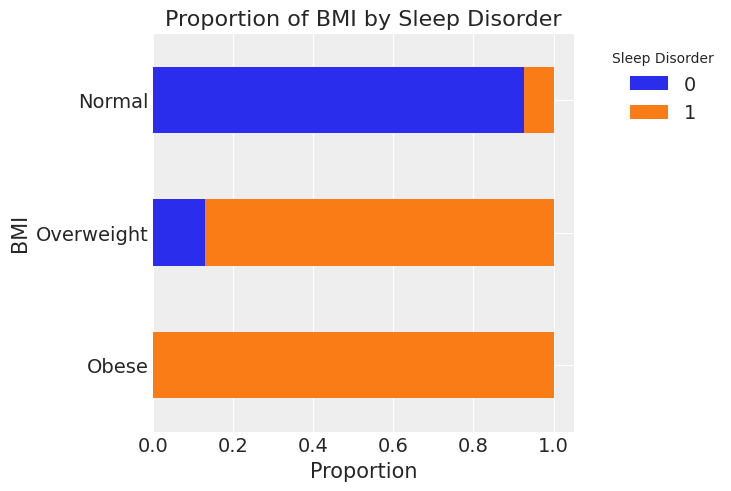

In [ ]:
# Placed categories in logical order

# Define the desired order of the labels
desired_order = ['Obese', 'Overweight', 'Normal']  # Replace with your specific order

# Reorder the index based on the desired_order
normalized_data = normalized_data.reindex(desired_order)

# Plotting normalized data as a horizontal stacked bar plot
plt.figure(figsize=(8, 10))  # Adjust the figure size as needed
normalized_data.plot(kind='barh', stacked=True)
plt.title('Proportion of BMI by Sleep Disorder')
plt.xlabel('Proportion')
plt.ylabel('BMI')

# Adjusting legend position
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjusts the plot layout
plt.show()

<ipython-input-81-a965ea899e0e>:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjusts the plot layout


<Figure size 800x1000 with 0 Axes>

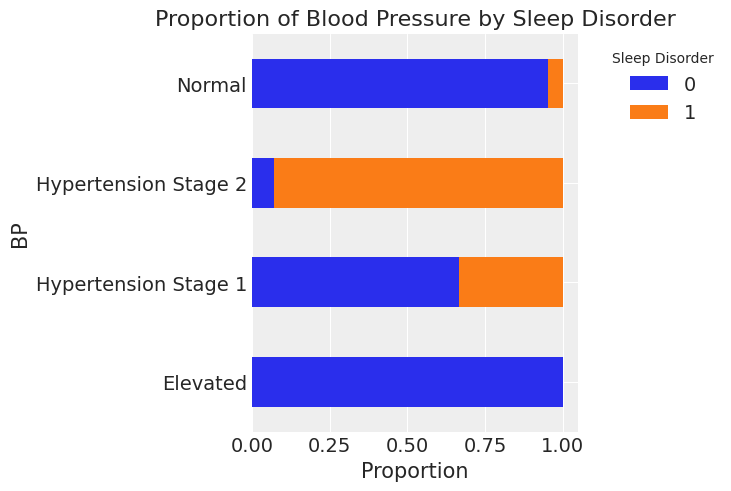

In [ ]:
# Normalize data to represent proportions
normalized_data = pd.crosstab(sleep['BP_Category'], sleep['Sleep_Disorder'], normalize='index')

# Plotting normalized data as a horizontal stacked bar plot
plt.figure(figsize=(8, 10))  # Adjust the figure size as needed
normalized_data.plot(kind='barh', stacked=True)
plt.title('Proportion of Blood Pressure by Sleep Disorder')
plt.xlabel('Proportion')
plt.ylabel('BP')

# Adjusting legend position
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjusts the plot layout
plt.show()

<ipython-input-82-d4a136bcee3e>:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjusts the plot layout


<Figure size 800x1000 with 0 Axes>

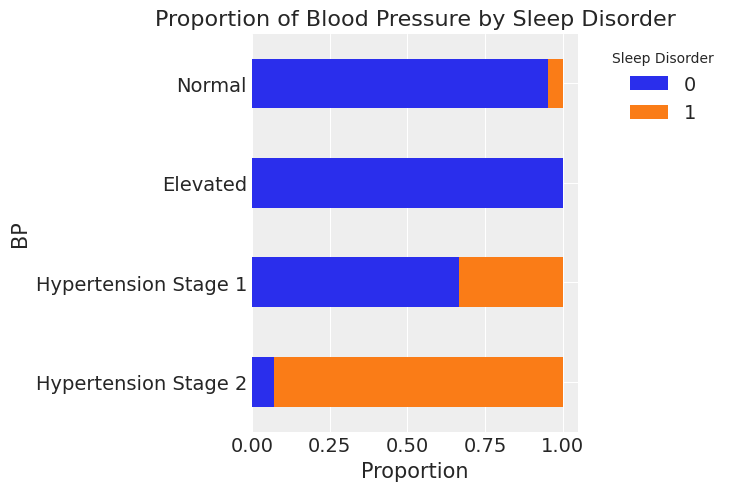

In [ ]:
# Placed categories in logical order

# Define the desired order of the labels
desired_order = ['Hypertension Stage 2',  'Hypertension Stage 1', 'Elevated', 'Normal']  # Replace with your specific order

# Reorder the index based on the desired_order
normalized_data = normalized_data.reindex(desired_order)

# Plotting normalized data as a horizontal stacked bar plot
plt.figure(figsize=(8, 10))  # Adjust the figure size as needed
normalized_data.plot(kind='barh', stacked=True)
plt.title('Proportion of Blood Pressure by Sleep Disorder')
plt.xlabel('Proportion')
plt.ylabel('BP')

# Adjusting legend position
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjusts the plot layout
plt.show()

<ipython-input-25-f9ceccbe4a5b>:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjusts the plot layout


<Figure size 800x1000 with 0 Axes>

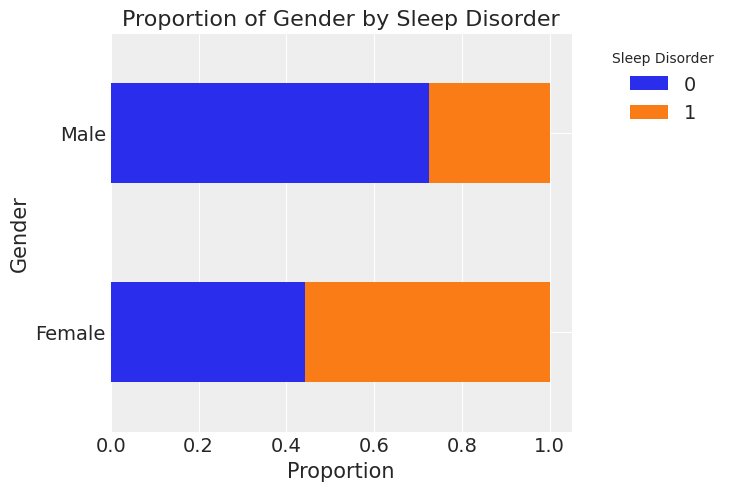

In [ ]:
# Normalize data to represent proportions
normalized_data = pd.crosstab(sleep['Gender'], sleep['Sleep_Disorder'], normalize='index')

# Plotting normalized data as a horizontal stacked bar plot
plt.figure(figsize=(8, 10))  # Adjust the figure size as needed
normalized_data.plot(kind='barh', stacked=True)
plt.title('Proportion of Gender by Sleep Disorder')
plt.xlabel('Proportion')
plt.ylabel('Gender')

# Adjusting legend position
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjusts the plot layout
plt.show()

In [ ]:
# one-hot coding for categorical variables
sleep['Gender'] = pd.factorize(sleep['Gender'])[0]

sleep['Occupation'] = pd.factorize(sleep['Occupation'])[0]

sleep['BMI_Category'] = pd.factorize(sleep['BMI_Category'])[0]

sleep['BP_Category'] = pd.factorize(sleep['BP_Category'])[0]

sleep.head()

Person_ID  Gender       Age  Occupation  Sleep_Duration  Sleep_Quality  \
0  -1.727426       0 -1.753096           0       -1.298887      -1.098280   
1  -1.718163       0 -1.637643           1       -1.173036      -1.098280   
2  -1.708901       0 -1.637643           1       -1.173036      -1.098280   
3  -1.699639       0 -1.637643           2       -1.550588      -2.771424   
4  -1.690376       0 -1.637643           2       -1.550588      -2.771424   

   Physical_Activity_Level  Stress_Level  BMI_Category Blood_Pressure  \
0                -0.825418      0.347021             0         126/83   
1                 0.039844      1.475592             1         125/80   
2                 0.039844      1.475592             1         125/80   
3                -1.402260      1.475592             2         140/90   
4                -1.402260      1.475592             2         140/90   

   Heart_Rate  Daily_Steps  Sleep_Disorder  Systolic_BP  Diastolic_BP  \
0    1.654719    -1.619584               0          126            83   
1    1.170474     1.970077               0          125            80   
2    1.170474     1.970077               0          125            80   
3    3.591698    -2.362273               1          140            90   
4    3.591698    -2.362273               1          140            90   

   BP_Category  
0            0  
1            0  
2            0  
3            1  
4            1

In [ ]:
# finalize and sort the dataset
selected_columns = ['Gender', 'Age', 'Occupation', 'Sleep_Duration', 'Sleep_Quality', 'Physical_Activity_Level',
                    'Stress_Level', 'BMI_Category', 'Heart_Rate', 'Daily_Steps', 'BP_Category', 'Sleep_Disorder']

df = sleep[selected_columns]

In [ ]:
df

Gender       Age  Occupation  Sleep_Duration  Sleep_Quality  \
0         0 -1.753096           0       -1.298887      -1.098280   
1         0 -1.637643           1       -1.173036      -1.098280   
2         0 -1.637643           1       -1.173036      -1.098280   
3         0 -1.637643           2       -1.550588      -2.771424   
4         0 -1.637643           2       -1.550588      -2.771424   
..      ...       ...         ...             ...            ...   
369       1  1.941401           4        1.218127       1.411435   
370       1  1.941401           4        1.092276       1.411435   
371       1  1.941401           4        1.218127       1.411435   
372       1  1.941401           4        1.218127       1.411435   
373       1  1.941401           4        1.218127       1.411435   

     Physical_Activity_Level  Stress_Level  BMI_Category  Heart_Rate  \
0                  -0.825418      0.347021             0    1.654719   
1                   0.039844      1.475592             1    1.170474   
2                   0.039844      1.475592             1    1.170474   
3                  -1.402260      1.475592             2    3.591698   
4                  -1.402260      1.475592             2    3.591698   
..                       ...           ...           ...         ...   
369                 0.760896     -1.345836             0   -0.524383   
370                 0.760896     -1.345836             0   -0.524383   
371                 0.760896     -1.345836             0   -0.524383   
372                 0.760896     -1.345836             0   -0.524383   
373                 0.760896     -1.345836             0   -0.524383   

     Daily_Steps  BP_Category  Sleep_Disorder  
0      -1.619584            0               0  
1       1.970077            0               0  
2       1.970077            0               0  
3      -2.362273            1               1  
4      -2.362273            1               1  
..           ...          ...             ...  
369     0.113356            1               1  
370     0.113356            1               1  
371     0.113356            1               1  
372     0.113356            1               1  
373     0.113356            1               1  

[374 rows x 12 columns]

In [ ]:
#EDA
columns_to_visualize = ['Sleep_Disorder', 'Age', 'Sleep_Duration', 'Sleep_Quality',
                        'Physical_Activity_Level', 'Stress_Level', 'Heart_Rate', 'Daily_Steps']

df_melted = df.melt(id_vars='Sleep_Disorder', value_vars=columns_to_visualize, var_name='Variable', value_name='Value')
df_melted

Sleep_Disorder     Variable     Value
0                  0          Age -1.753096
1                  0          Age -1.637643
2                  0          Age -1.637643
3                  1          Age -1.637643
4                  1          Age -1.637643
...              ...          ...       ...
2613               1  Daily_Steps  0.113356
2614               1  Daily_Steps  0.113356
2615               1  Daily_Steps  0.113356
2616               1  Daily_Steps  0.113356
2617               1  Daily_Steps  0.113356

[2618 rows x 3 columns]

<ipython-input-30-7822f02218ac>:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


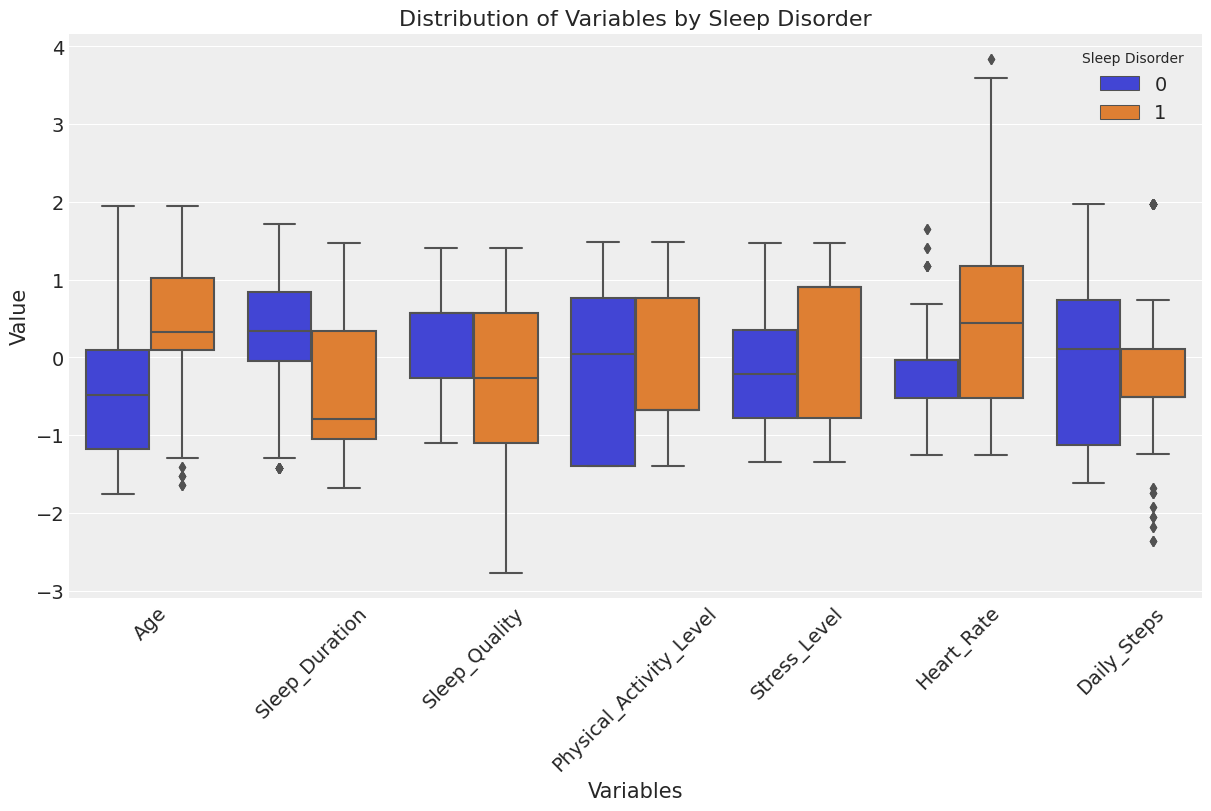

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x='Variable', y='Value', hue='Sleep_Disorder')
plt.title('Distribution of Variables by Sleep Disorder')
plt.xlabel('Variables')
plt.ylabel('Value')
plt.legend(title='Sleep Disorder')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **4. Main Effect Model**

### *According to our findings of the relationship of predictors with the response variable, we decided to use all numeric and categorical variables to build the Main Effect Bayesian Model.*

---
### *Due to a lack of knowledge about the parameter interests, we chose normal distribution as prior with mean of 0 and standard deviation of  for each parameter interest.*


---
### *Then, sampling convergence was checked with trace plots. The range of values predicted by the mode was checked with Bayesian p-value. Additionlly, the model's validity was affirmed and the effect of each variable has on the response variable was detected by performing posterior predictive check.*
---
### *Lastly, uncertainity for predictors was explored by plotting the 95% HDI for probability for having sleep disorder.*


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


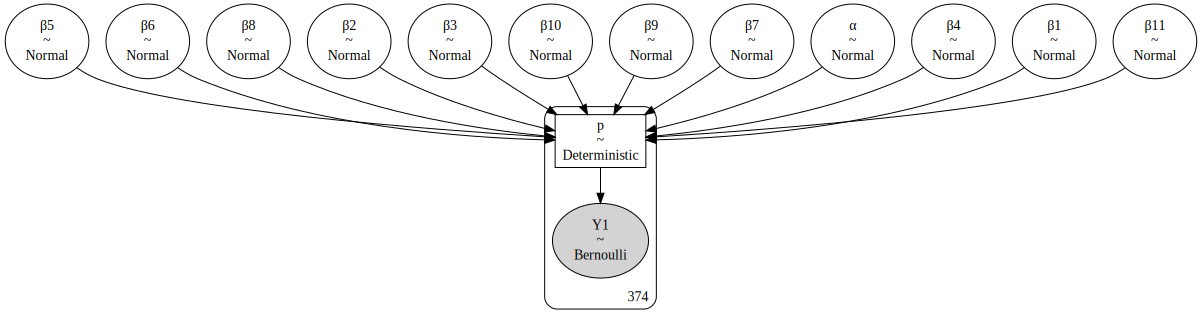

In [ ]:
#main effects model
with pm.Model() as main_eff_model:
    Y = df["Sleep_Disorder"]
    α = pm.Normal('α', mu=0, sigma=10)
    β1 = pm.Normal('β1', mu=0, sigma=10)
    β2 = pm.Normal('β2', mu=0, sigma=10)
    β3 = pm.Normal('β3', mu=0, sigma=10)
    β4 = pm.Normal('β4', mu=0, sigma=10)
    β5 = pm.Normal('β5', mu=0, sigma=10)
    β6 = pm.Normal('β6', mu=0, sigma=10)
    β7 = pm.Normal('β7', mu=0, sigma=10)
    β8 = pm.Normal('β8', mu=0, sigma=10)
    β9 = pm.Normal('β9', mu=0, sigma=10)
    β10 = pm.Normal('β10', mu=0, sigma=10)
    β11 = pm.Normal('β11', mu=0, sigma=10)

    mu = α+β1*df["Age"]+β2*df['Occupation']+β3*df["Sleep_Duration"]+β4*df["Sleep_Quality"]+β5*df["Physical_Activity_Level"]+β6*df["Stress_Level"]+β7*df["BMI_Category"]+β8*df["Heart_Rate"]+β9*df["Daily_Steps"]+β10*df["BP_Category"]+β11*df["Gender"]

    p = pm.Deterministic('p', pm.invlogit(mu))

    Y1 = pm.Bernoulli('Y1', p=p, observed=Y)

    trace = pm.sample(1000, tune=2000, random_seed=random_seed, cores=8,return_inferencedata=False)

pm.model_to_graphviz(main_eff_model)


In [ ]:
sleep_trace=pm.to_inference_data(trace=trace, model=main_eff_model,log_likelihood=True)

In [ ]:
## prior predictive check
sleep_ppc = pm.sample_prior_predictive(model = main_eff_model, random_seed = random_seed)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


<Axes: >

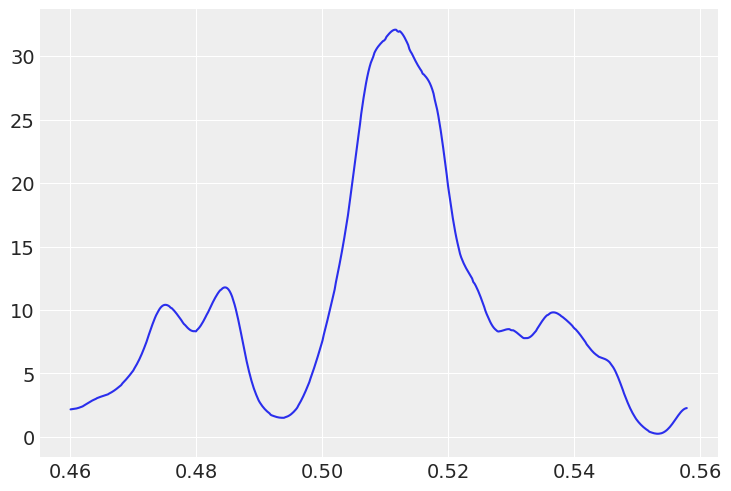

In [ ]:
az.plot_dist(sleep_ppc.prior_predictive['Y1'].mean(dim=['chain','draw']))

<Axes: >

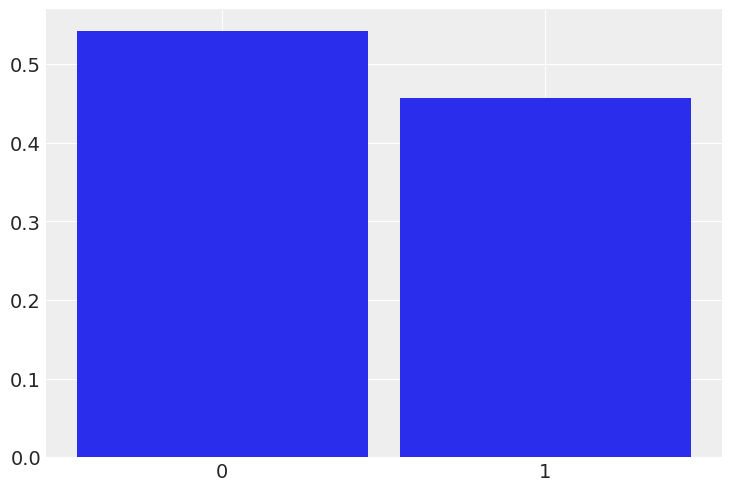

In [ ]:
# Predicted sleep disorder

# Define a threshold (e.g., 0.4)
threshold = 0.513

# Convert probabilities to binary using the threshold
binary_output = (sleep_ppc.prior_predictive['Y1'].mean(dim=['chain','draw']) > threshold).astype(int)

# Plot the distribution of binary output
az.plot_dist(binary_output)

<Axes: >

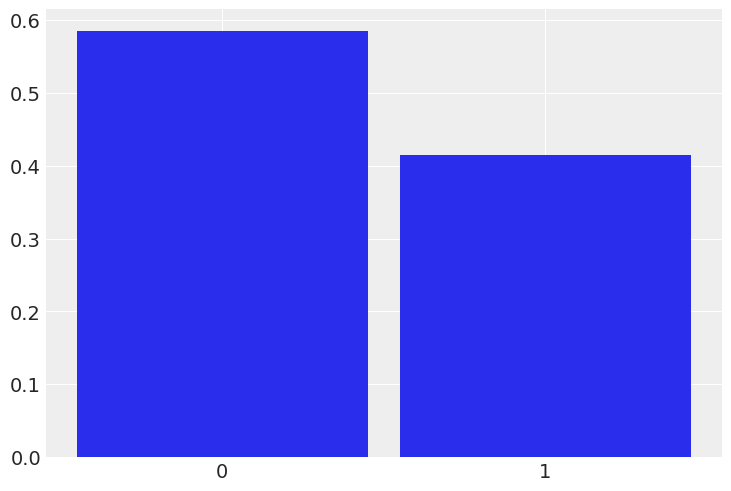

In [ ]:
# Observed sleep
az.plot_dist(sleep_ppc.observed_data['Y1'])

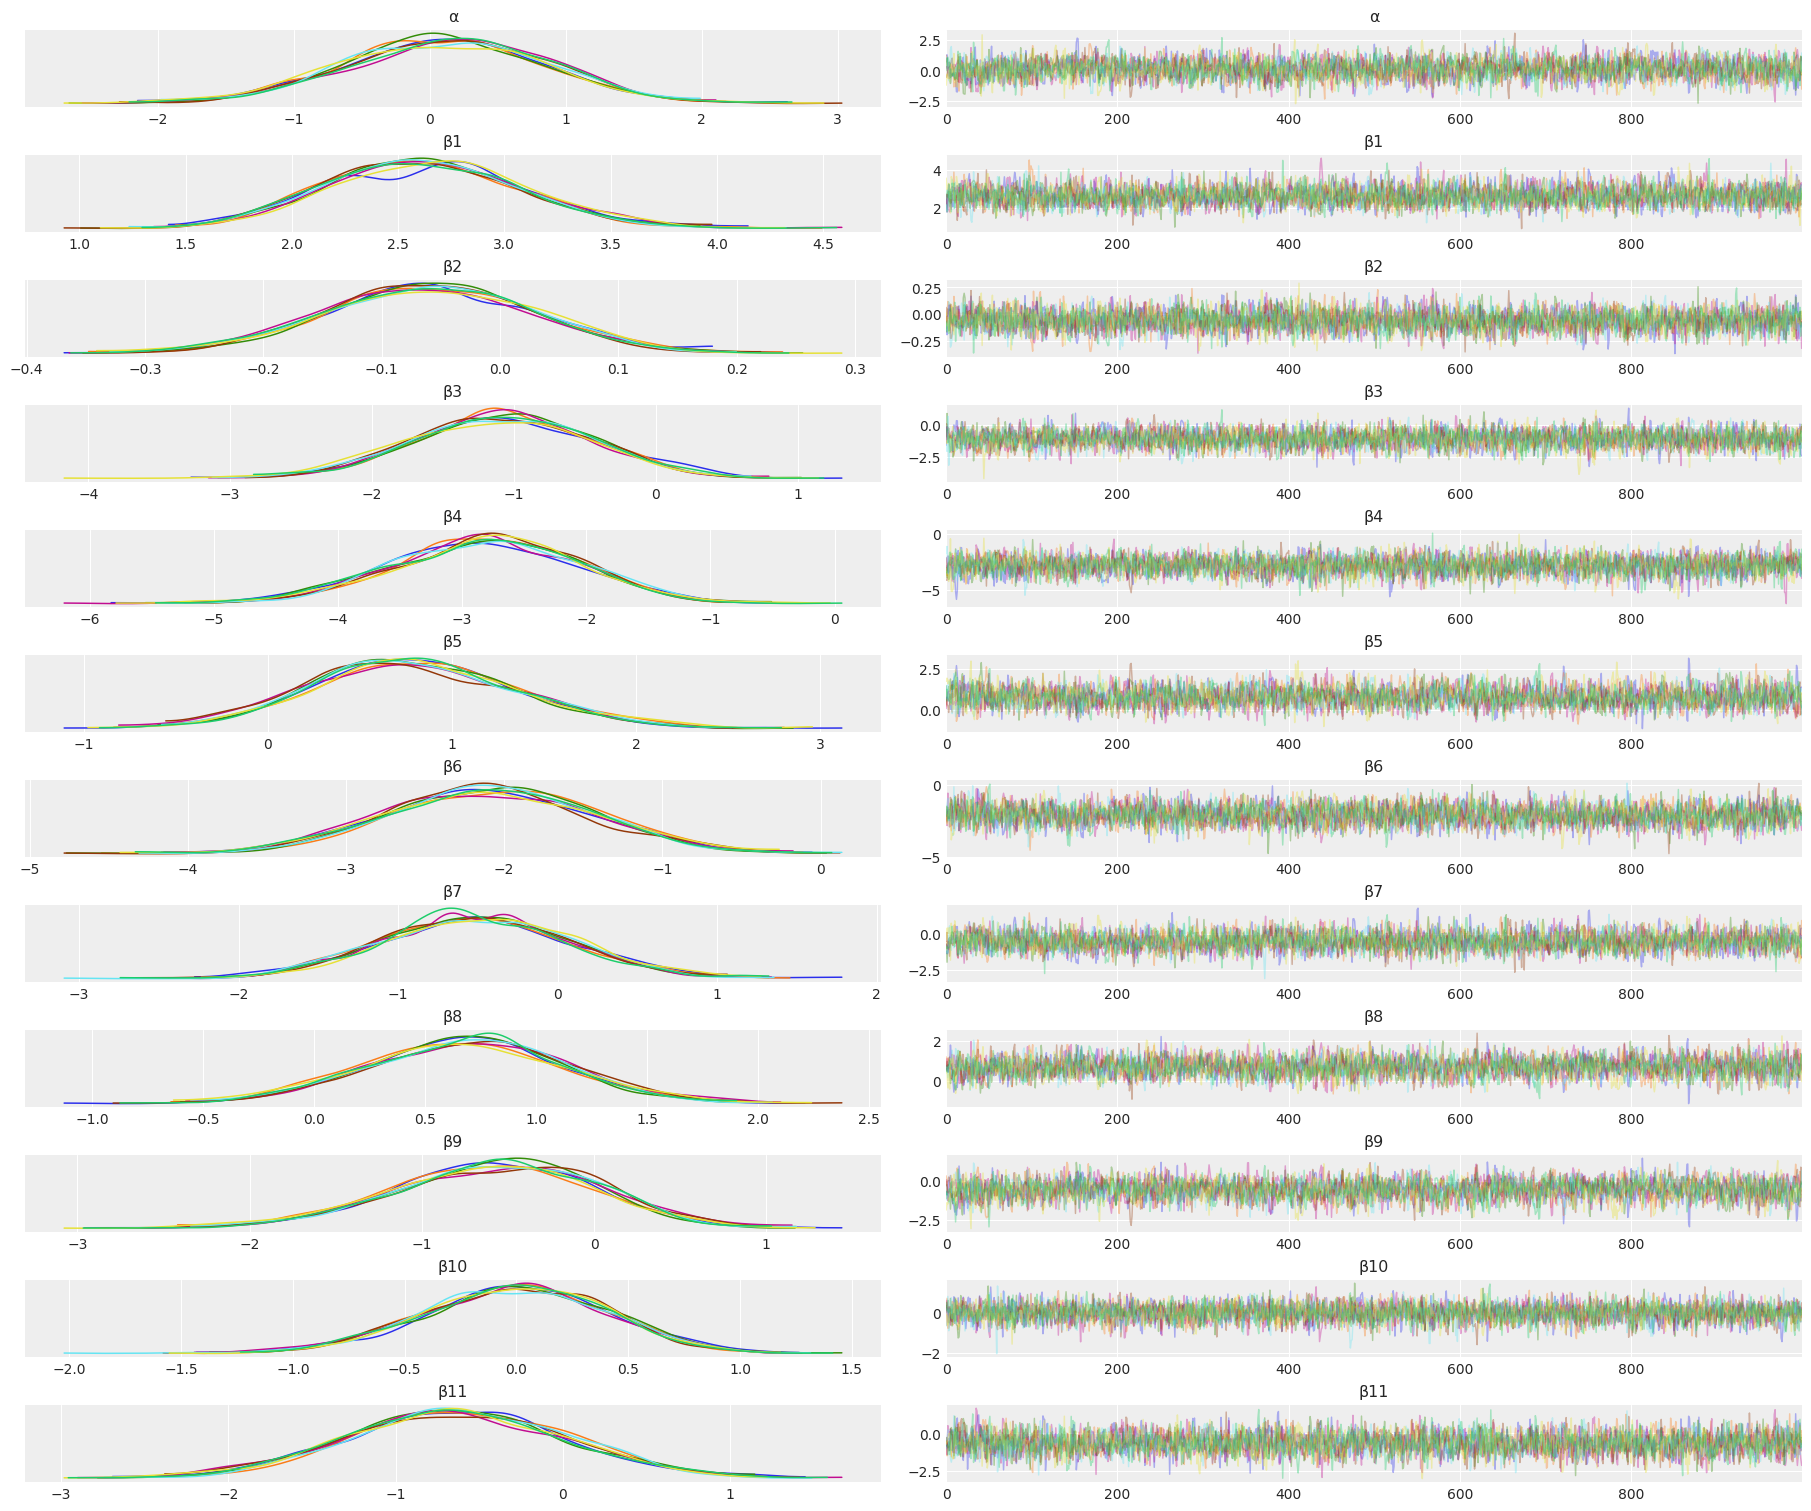

In [ ]:
# check convergence
az.plot_trace(sleep_trace, compact = False, var_names = ['α','β1','β2','β3','β4', 'β5', 'β6', 'β7', 'β8', 'β9', 'β10', 'β11'], figsize = (18,15));

In [ ]:
# convergence check by using r_hat
az.summary(sleep_trace, var_names= ['α','β1','β2','β3','β4', 'β5', 'β6', 'β7', 'β8', 'β9', 'β10', 'β11'])

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
α    0.114  0.748  -1.264    1.498      0.011    0.008    4260.0    5200.0   
β1   2.627  0.464   1.800    3.517      0.007    0.005    4986.0    5145.0   
β2  -0.059  0.090  -0.227    0.112      0.001    0.001    5932.0    5526.0   
β3  -1.080  0.634  -2.222    0.147      0.009    0.006    5577.0    4909.0   
β4  -2.815  0.759  -4.232   -1.426      0.010    0.007    5730.0    4870.0   
β5   0.797  0.559  -0.229    1.872      0.009    0.007    3685.0    4260.0   
β6  -2.083  0.653  -3.335   -0.920      0.010    0.007    4557.0    5109.0   
β7  -0.507  0.592  -1.593    0.613      0.008    0.006    4865.0    5674.0   
β8   0.684  0.447  -0.204    1.490      0.007    0.005    3794.0    4310.0   
β9  -0.582  0.600  -1.751    0.500      0.010    0.007    3717.0    4365.0   
β10 -0.012  0.413  -0.792    0.751      0.005    0.004    6952.0    5920.0   
β11 -0.633  0.659  -1.815    0.676      0.009    0.007    4916.0    5533.0   

     r_hat  
α      1.0  
β1     1.0  
β2     1.0  
β3     1.0  
β4     1.0  
β5     1.0  
β6     1.0  
β7     1.0  
β8     1.0  
β9     1.0  
β10    1.0  
β11    1.0

In [ ]:
# posterior predictions
sleep_pp = pm.sample_posterior_predictive(sleep_trace, model = main_eff_model, random_seed = random_seed)

<Axes: title={'center': 'Y1 / Y1'}>

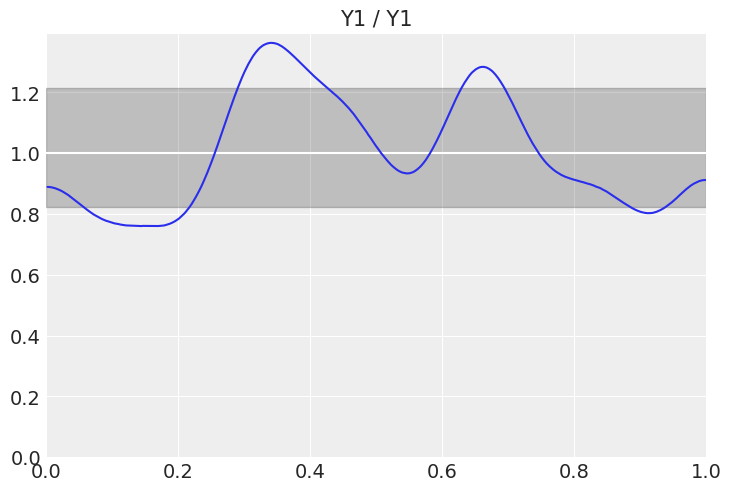

In [ ]:
# bayesian p value
az.plot_bpv(sleep_pp)

<Axes: xlabel='Y1 / Y1'>

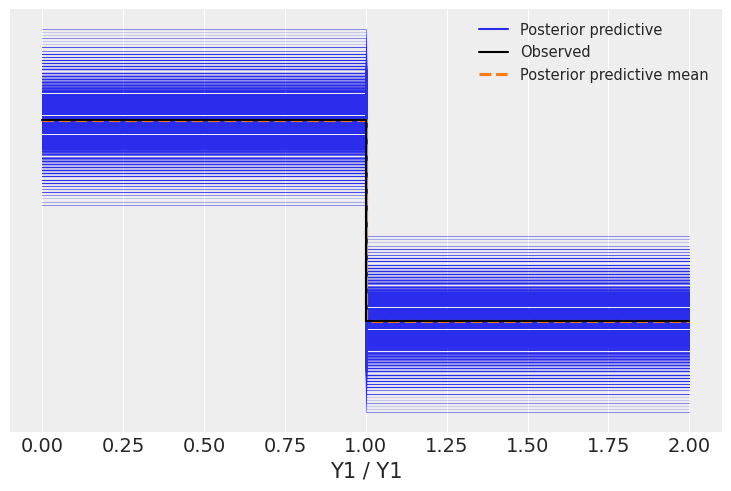

In [ ]:
az.plot_ppc(sleep_pp)

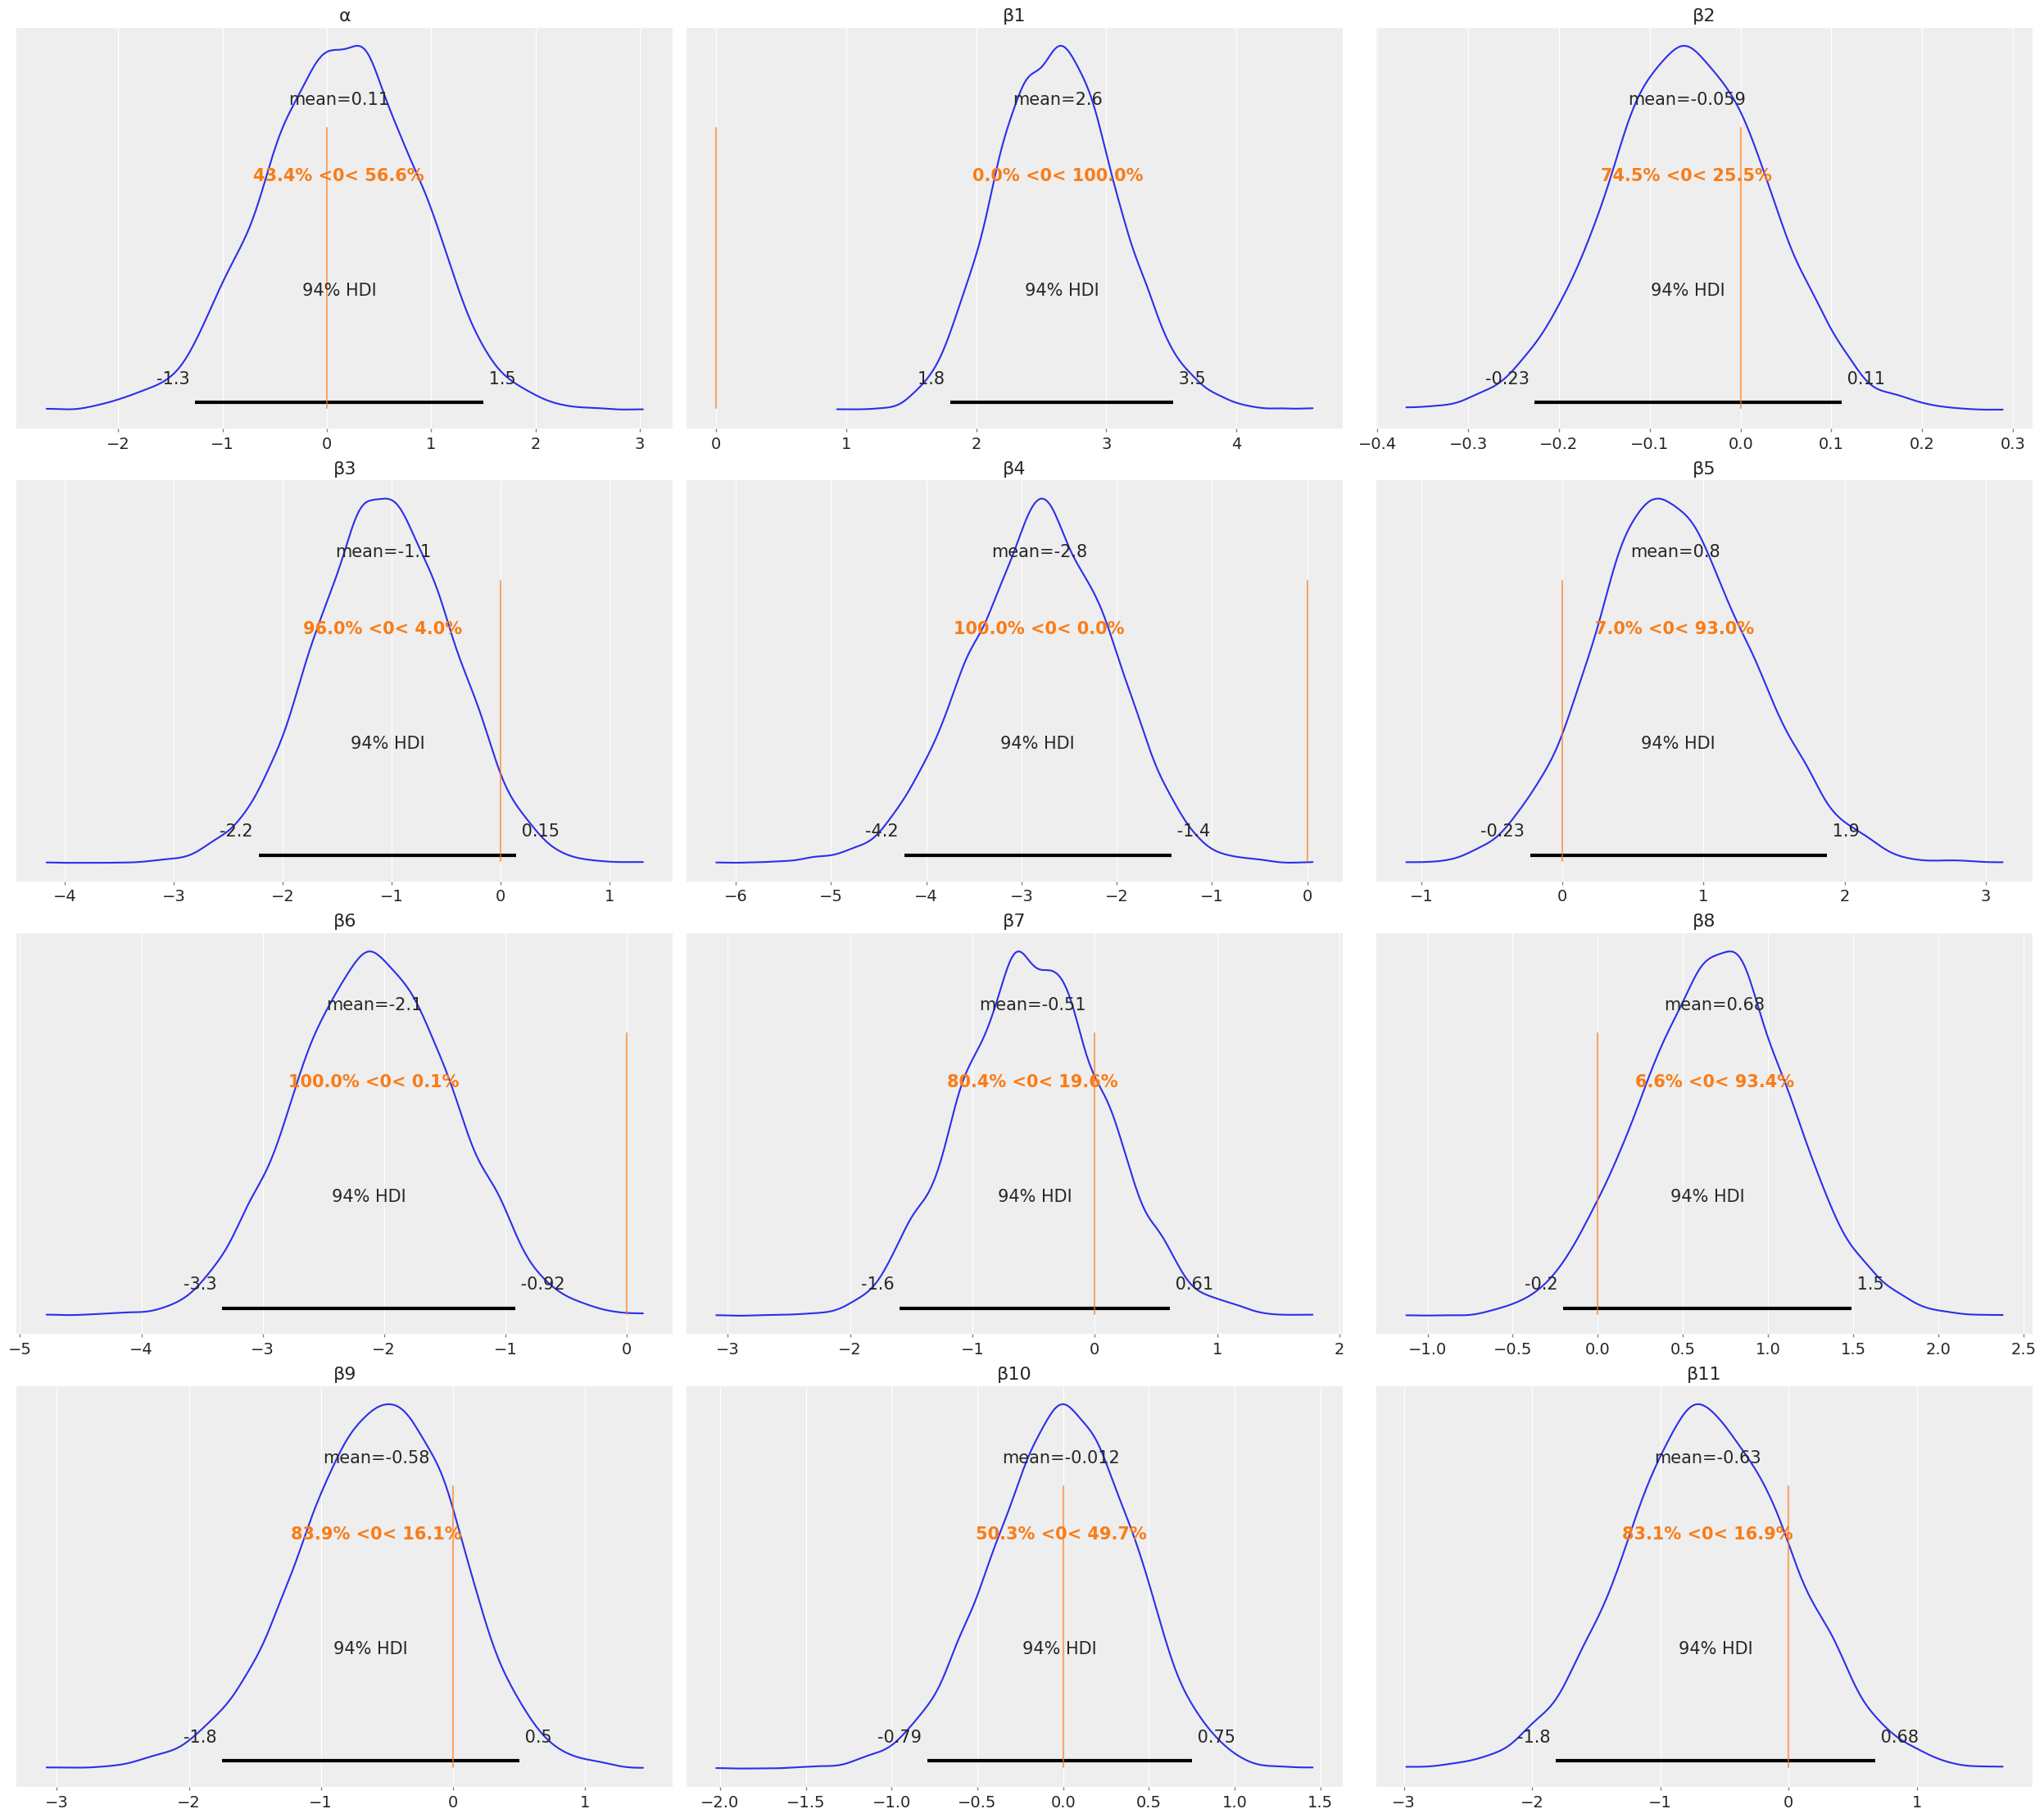

In [ ]:
az.plot_posterior(sleep_trace,var_names=['α','β1','β2','β3','β4', 'β5', 'β6', 'β7', 'β8', 'β9', 'β10', 'β11'], ref_val = 0,);

<ipython-input-43-f4f8a971d5b2>:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


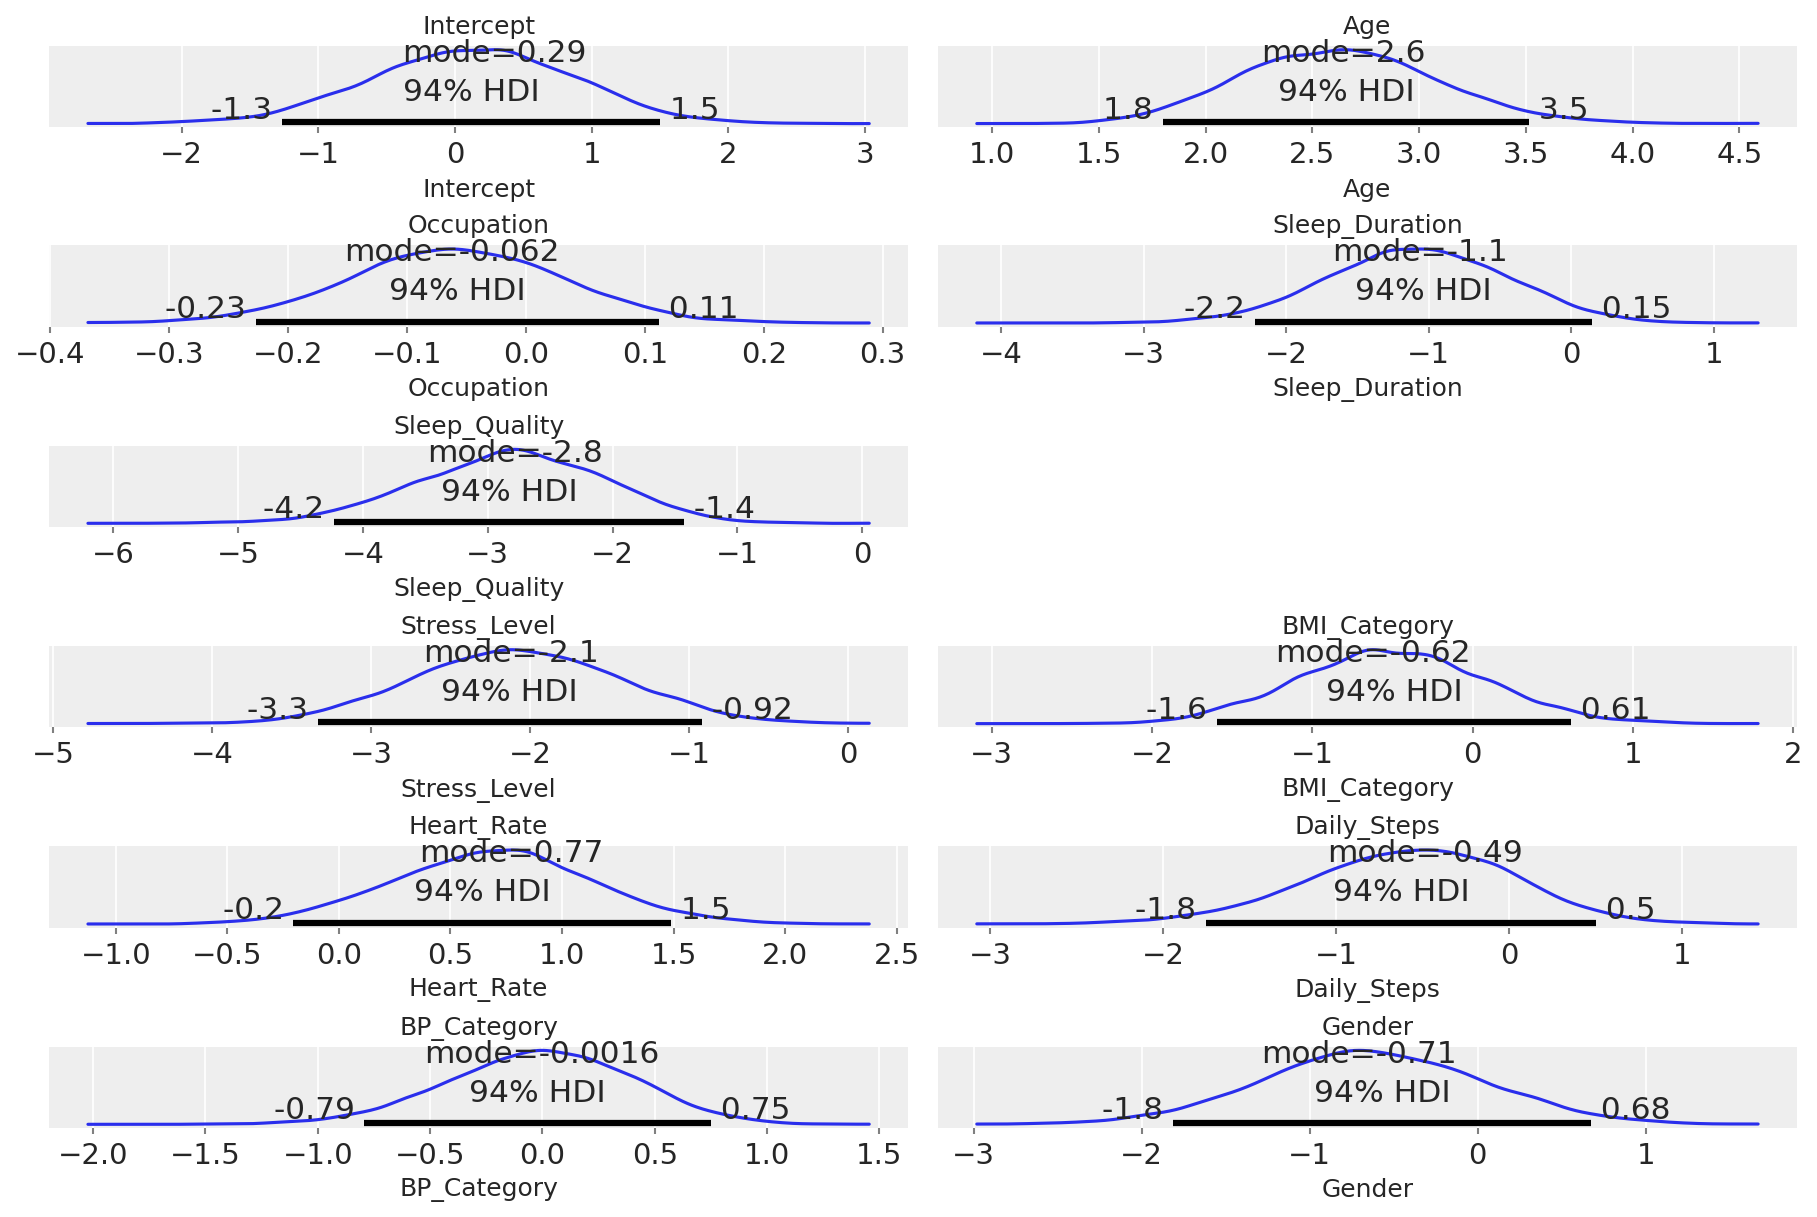

In [ ]:
# Plot posteriors with HDI and variable name

all_predictors = ['Age', 'Occupation', 'Sleep_Duration', 'Sleep_Quality', 'Physical_Activity_Level',
                  'Stress_Level', 'BMI_Category', 'Heart_Rate', 'Daily_Steps', 'BP_Category', 'Gender']
parameters = ['α','β1','β2','β3','β4', 'β5', 'β6', 'β7', 'β8', 'β9', 'β10', 'β11']

fig, axes = plt.subplots(6,2, figsize=(12,8), dpi=150)
for ax, estimate, title, xlabel in zip(fig.axes,
                                      (sleep_trace.posterior[i] for i in parameters),
                                       ['Intercept'] + all_predictors,
                                        ['Intercept'] + all_predictors):
    pm.plot_posterior(estimate, point_estimate='mode', ax=ax)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=12)

fig.delaxes(axes[2,1])
plt.tight_layout()

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

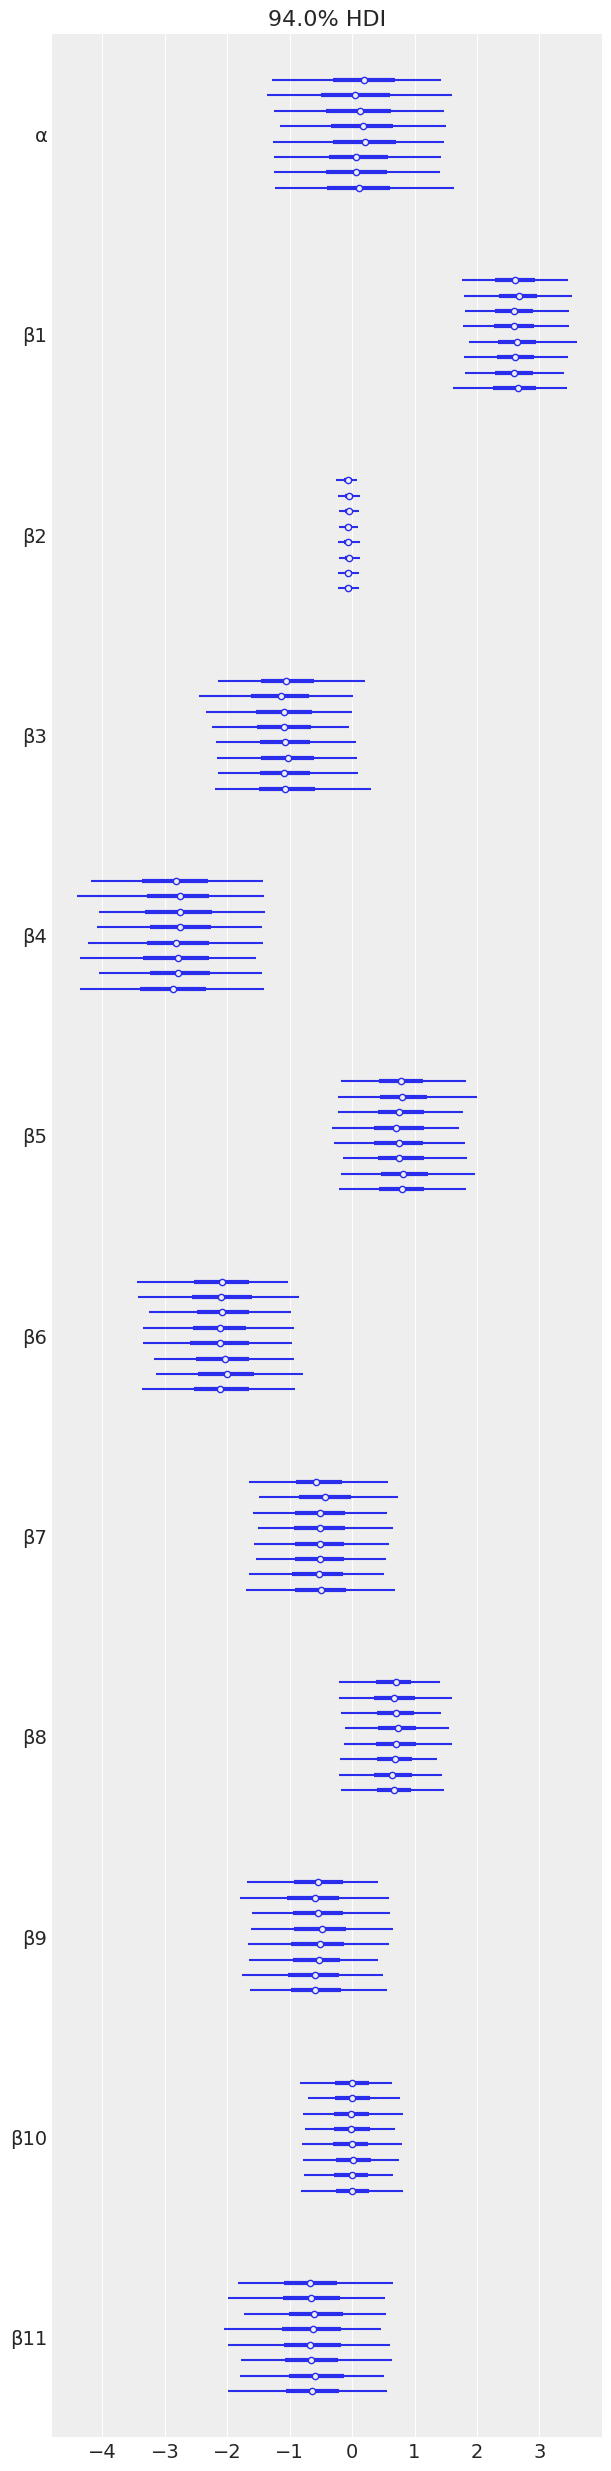

In [ ]:
# forest plot
az.plot_forest(sleep_trace, var_names=['α','β1','β2','β3','β4', 'β5', 'β6', 'β7', 'β8', 'β9', 'β10', 'β11'])

In [ ]:
sleep_no_scale = pd.read_csv('sleep.csv')
sleep_no_scale.head()

Person_ID Gender  Age            Occupation  Sleep_Duration  Sleep_Quality  \
0          1   Male   27     Software Engineer             6.1              6   
1          2   Male   28                Doctor             6.2              6   
2          3   Male   28                Doctor             6.2              6   
3          4   Male   28  Sales Representative             5.9              4   
4          5   Male   28  Sales Representative             5.9              4   

   Physical_Activity_Level  Stress_Level BMI_Category Blood_Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   
3                       30             8        Obese         140/90   
4                       30             8        Obese         140/90   

   Heart_Rate  Daily_Steps Sleep_Disorder  
0          77         4200           None  
1          75        10000           None  
2          75        10000           None  
3          85         3000    Sleep Apnea  
4          85         3000    Sleep Apnea

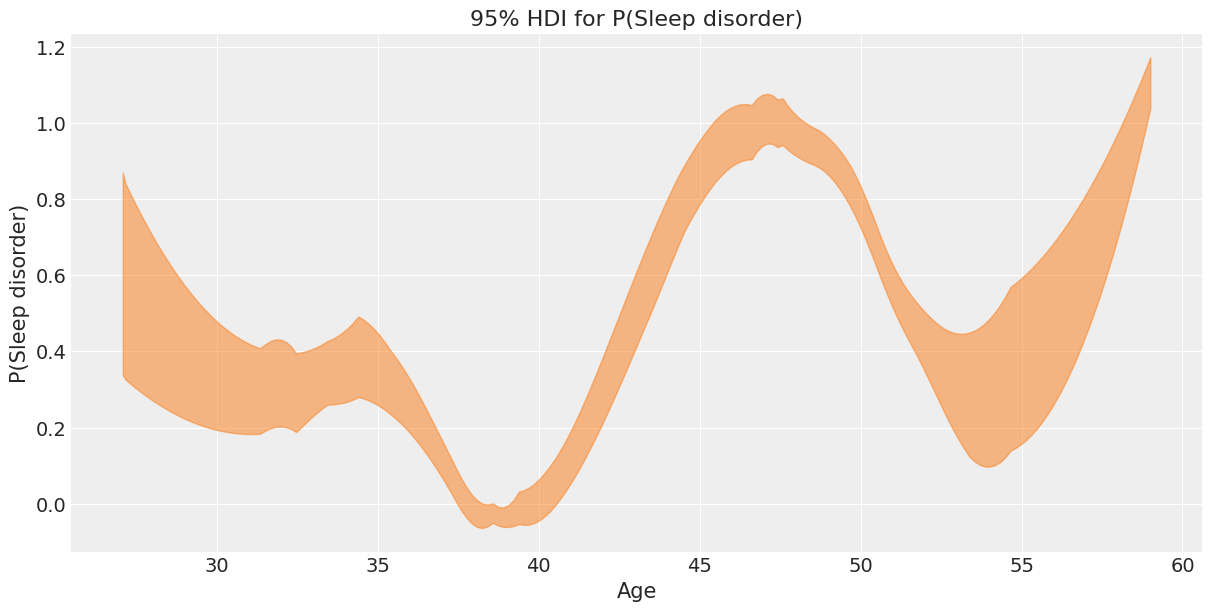

In [ ]:
 #uncertainity for age
_, ax = plt.subplots(figsize=(12, 6))
rates = sleep_trace.posterior["p"]
az.plot_hdi(sleep_no_scale['Age'], rates, smooth=True, hdi_prob=0.95)
rate_mean = sleep_trace.posterior["p"].mean(dim=["draw", "chain"])
ax.set_title("95% HDI for P(Sleep disorder)")
ax.set_xlabel("Age")
ax.set_ylabel("P(Sleep disorder)");

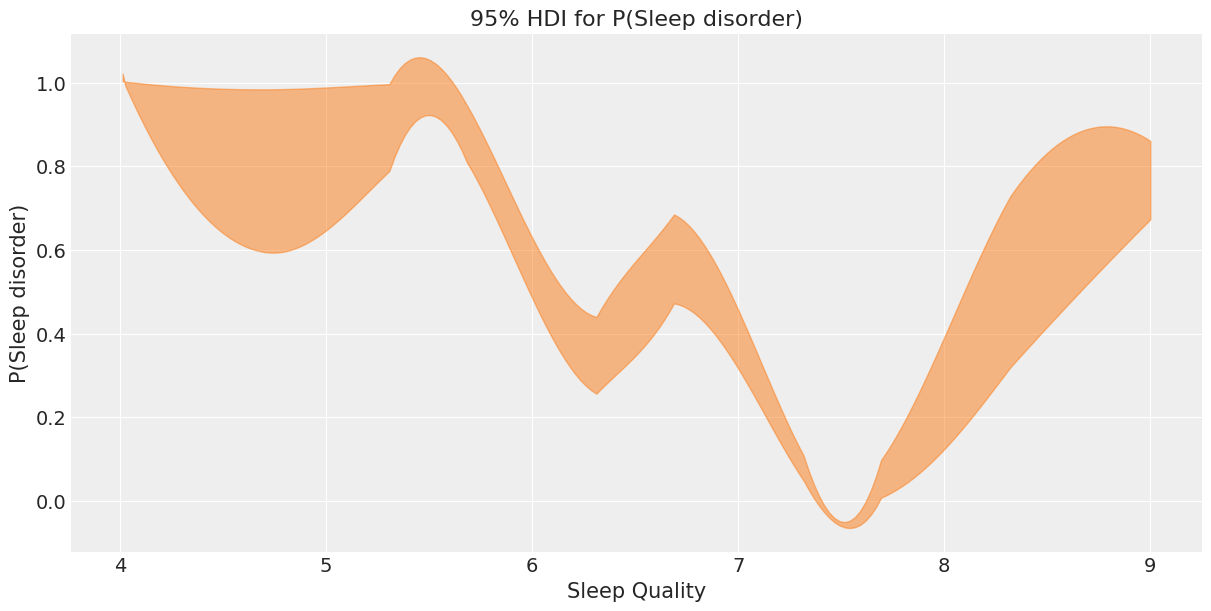

In [ ]:
#uncertainity for sleep quality
_, ax = plt.subplots(figsize=(12, 6))
rates = sleep_trace.posterior["p"]
az.plot_hdi(sleep_no_scale['Sleep_Quality'], rates, smooth=True, hdi_prob=0.95)
rate_mean = sleep_trace.posterior["p"].mean(dim=["draw", "chain"])
ax.set_title("95% HDI for P(Sleep disorder)")
ax.set_xlabel("Sleep Quality")
ax.set_ylabel("P(Sleep disorder)");

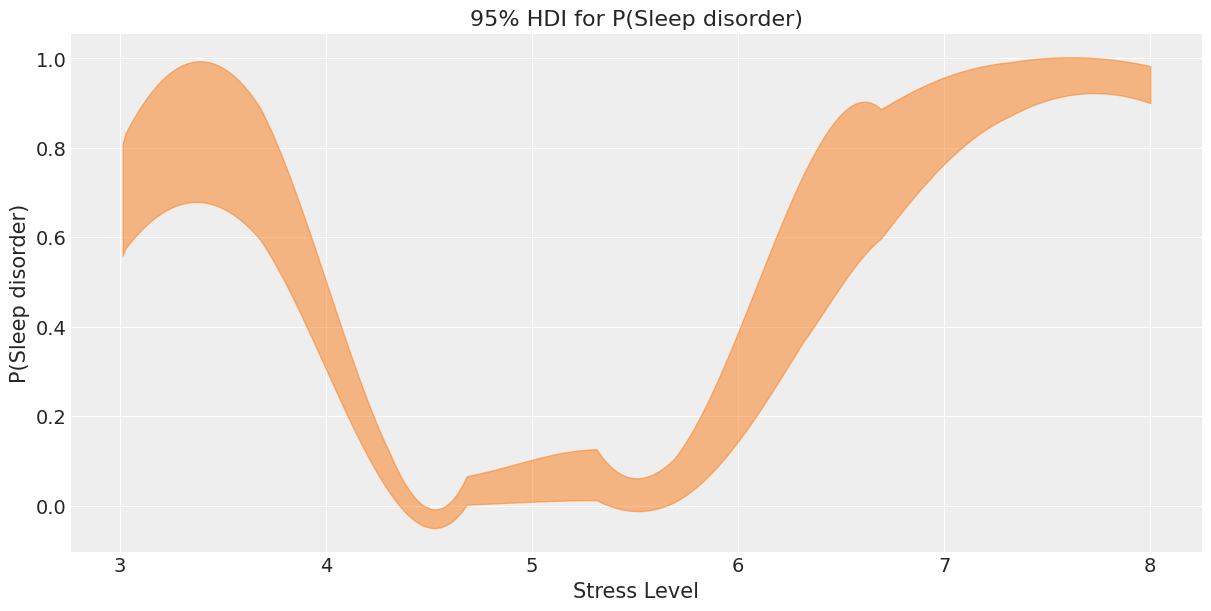

In [ ]:
#uncertainity for stress
_, ax = plt.subplots(figsize=(12, 6))
rates = sleep_trace.posterior["p"]
az.plot_hdi(sleep_no_scale['Stress_Level'], rates, smooth=True, hdi_prob=0.95)
rate_mean = sleep_trace.posterior["p"].mean(dim=["draw", "chain"])
ax.set_title("95% HDI for P(Sleep disorder)")
ax.set_xlabel("Stress Level")
ax.set_ylabel("P(Sleep disorder)");

# **5. Simpler Model**
### *Same steps were taken to make and assess the simple model with significant predictors based on the Main Effect Model's outcome.*

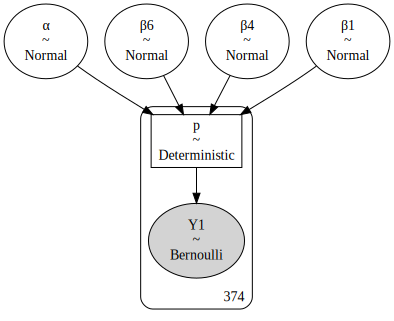

In [ ]:
# Simple model

# B1, B4, B6 are significant
#main effects model
with pm.Model() as simple_model:
    Y = df["Sleep_Disorder"]
    α = pm.Normal('α', mu=0, sigma=10)
    β1 = pm.Normal('β1', mu=0, sigma=10)
    β4 = pm.Normal('β4', mu=0, sigma=10)
    β6 = pm.Normal('β6', mu=0, sigma=10)

    mu = α+β1*df["Age"]+β4*df["Sleep_Quality"]+β6*df["Stress_Level"]

    p = pm.Deterministic('p', pm.invlogit(mu))

    Y1 = pm.Bernoulli('Y1', p=p, observed=Y)

    trace = pm.sample(1000, tune=2000, random_seed = random_seed,return_inferencedata=False)

pm.model_to_graphviz(simple_model)

In [ ]:
sleep_trace2 = pm.to_inference_data(trace=trace, model=simple_model,log_likelihood=True)

In [ ]:
## prior predictive check
sleep_ppc2 = pm.sample_prior_predictive(model = simple_model, random_seed=random_seed)

<Axes: >

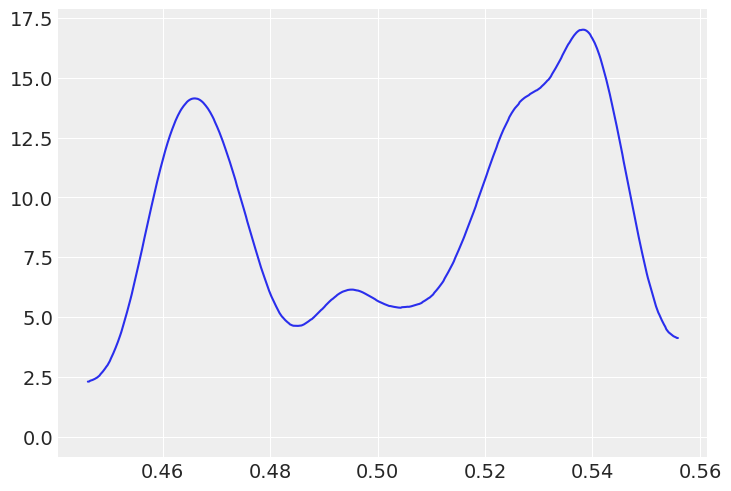

In [ ]:
az.plot_dist(sleep_ppc2.prior_predictive['Y1'].mean(dim=['chain','draw']))

<Axes: >

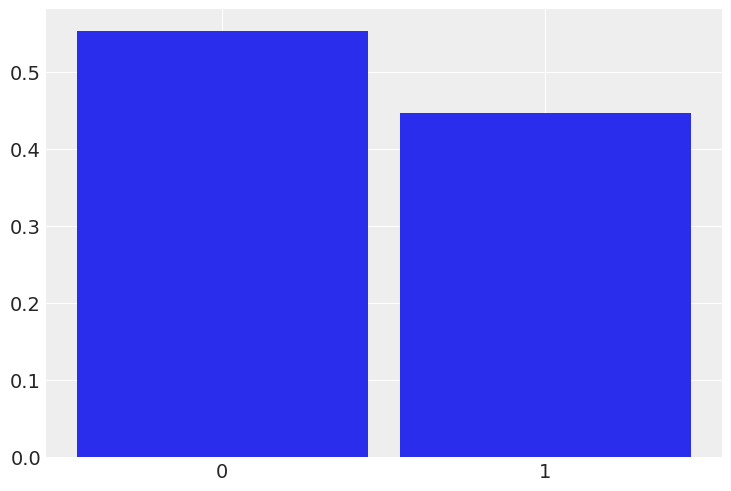

In [ ]:
# Predicted sleep disorder

# Define a threshold (e.g., 0.4)
threshold = 0.52

# Convert probabilities to binary using the threshold
binary_output = (sleep_ppc2.prior_predictive['Y1'].mean(dim=['chain','draw']) > threshold).astype(int)

# Plot the distribution of binary output
az.plot_dist(binary_output)

<Axes: >

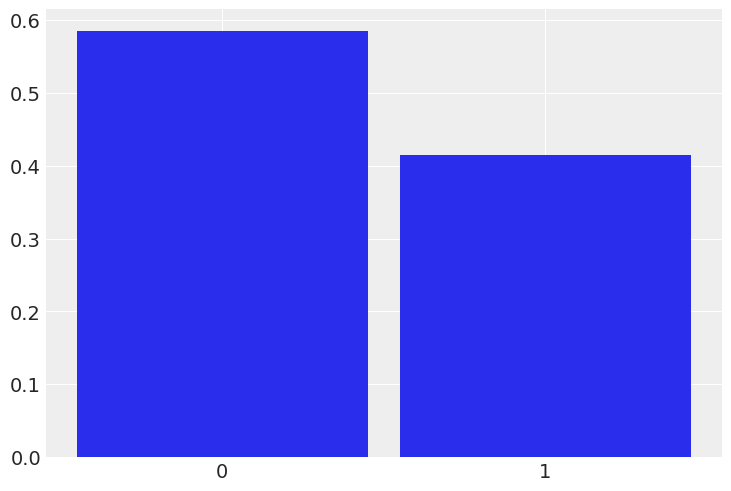

In [ ]:
# Observed sleep
az.plot_dist(sleep_ppc2.observed_data['Y1'])

In [ ]:
# Sample to get posterior
with simple_model:
    sleep_trace2 = pm.sample(1000, tune=2000, random_seed=random_seed, cores=8)

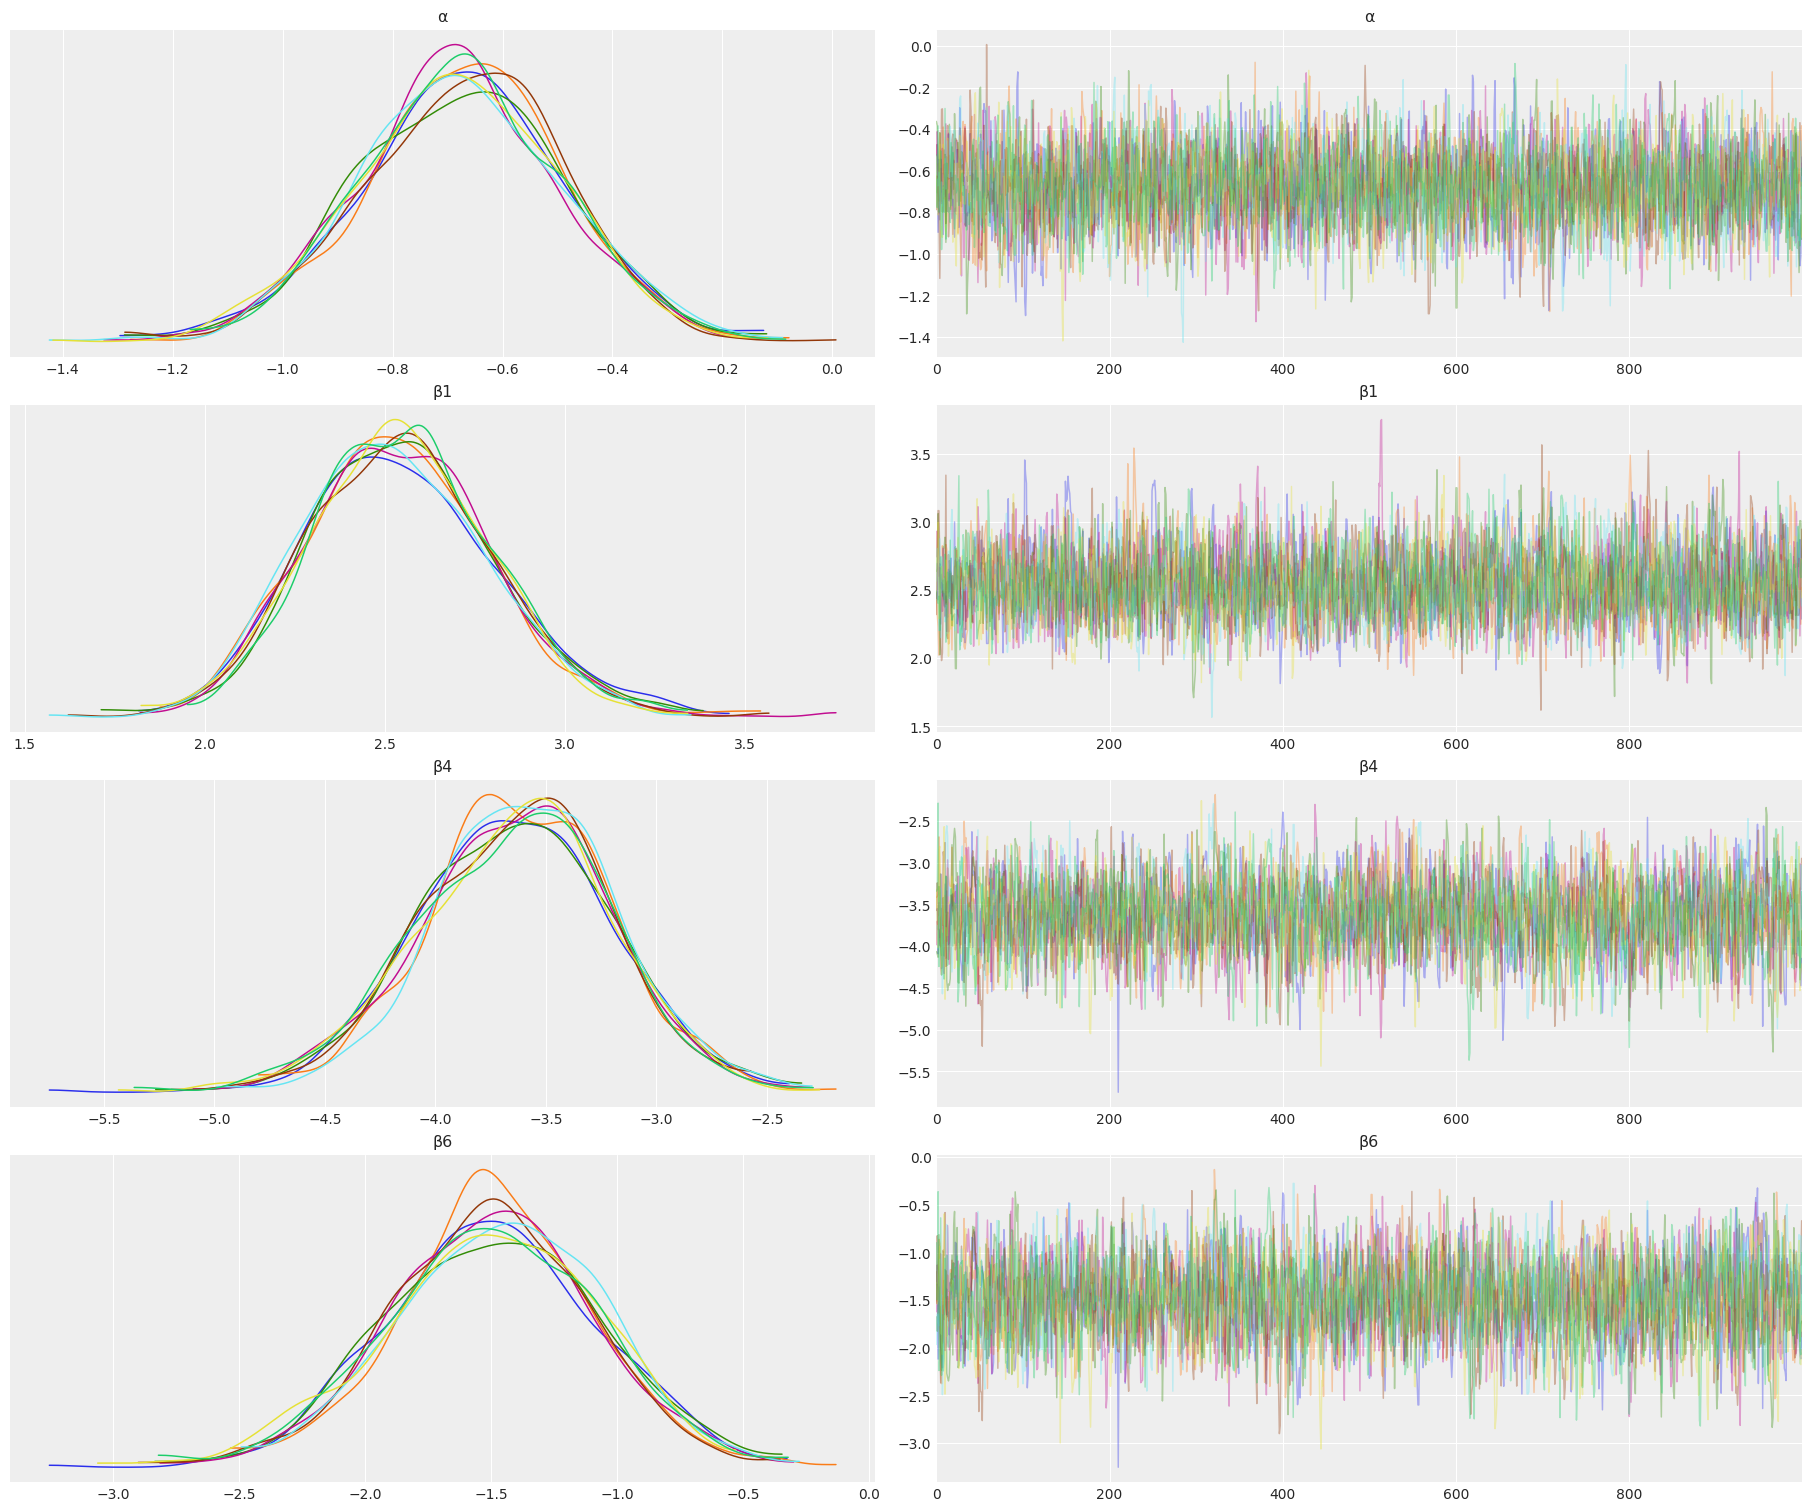

In [ ]:
az.plot_trace(sleep_trace2, compact = False, var_names = ['α','β1','β4', 'β6'], figsize = (18,15));

In [ ]:
az.summary(sleep_trace2, var_names= ['α','β1','β4', 'β6'])

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
α  -0.676  0.184  -1.013   -0.320      0.002    0.002    5701.0    5120.0   
β1  2.541  0.255   2.104    3.051      0.004    0.003    4393.0    4527.0   
β4 -3.637  0.432  -4.456   -2.826      0.007    0.005    3618.0    4278.0   
β6 -1.494  0.407  -2.261   -0.738      0.006    0.005    3958.0    4304.0   

    r_hat  
α     1.0  
β1    1.0  
β4    1.0  
β6    1.0

In [ ]:
# posterior predictions
sleep_pp2 = pm.sample_posterior_predictive(sleep_trace2, model = simple_model, random_seed = random_seed)

<Axes: title={'center': 'Y1 / Y1'}>

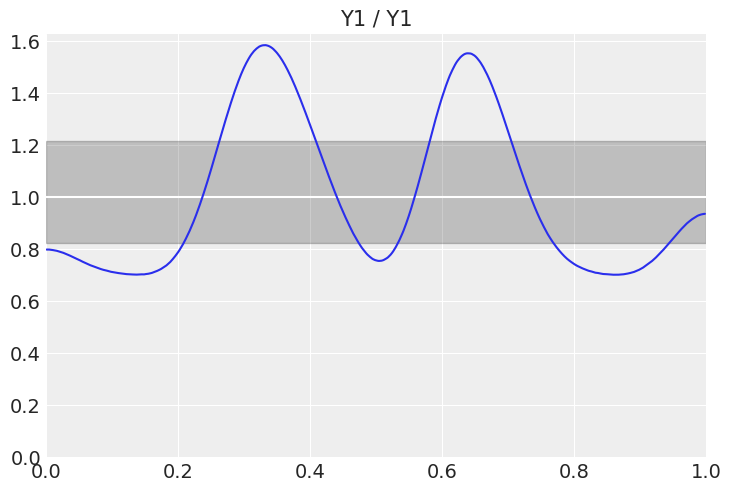

In [ ]:
# bayesian p value
az.plot_bpv(sleep_pp2)

<Axes: xlabel='Y1 / Y1'>

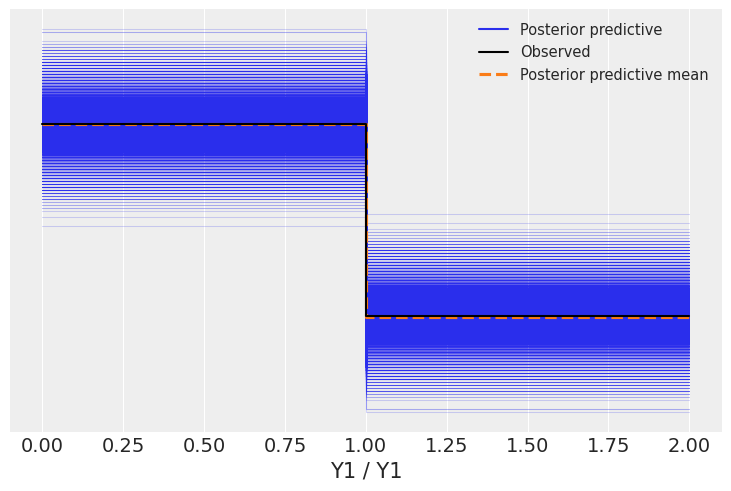

In [ ]:
az.plot_ppc(sleep_pp2)

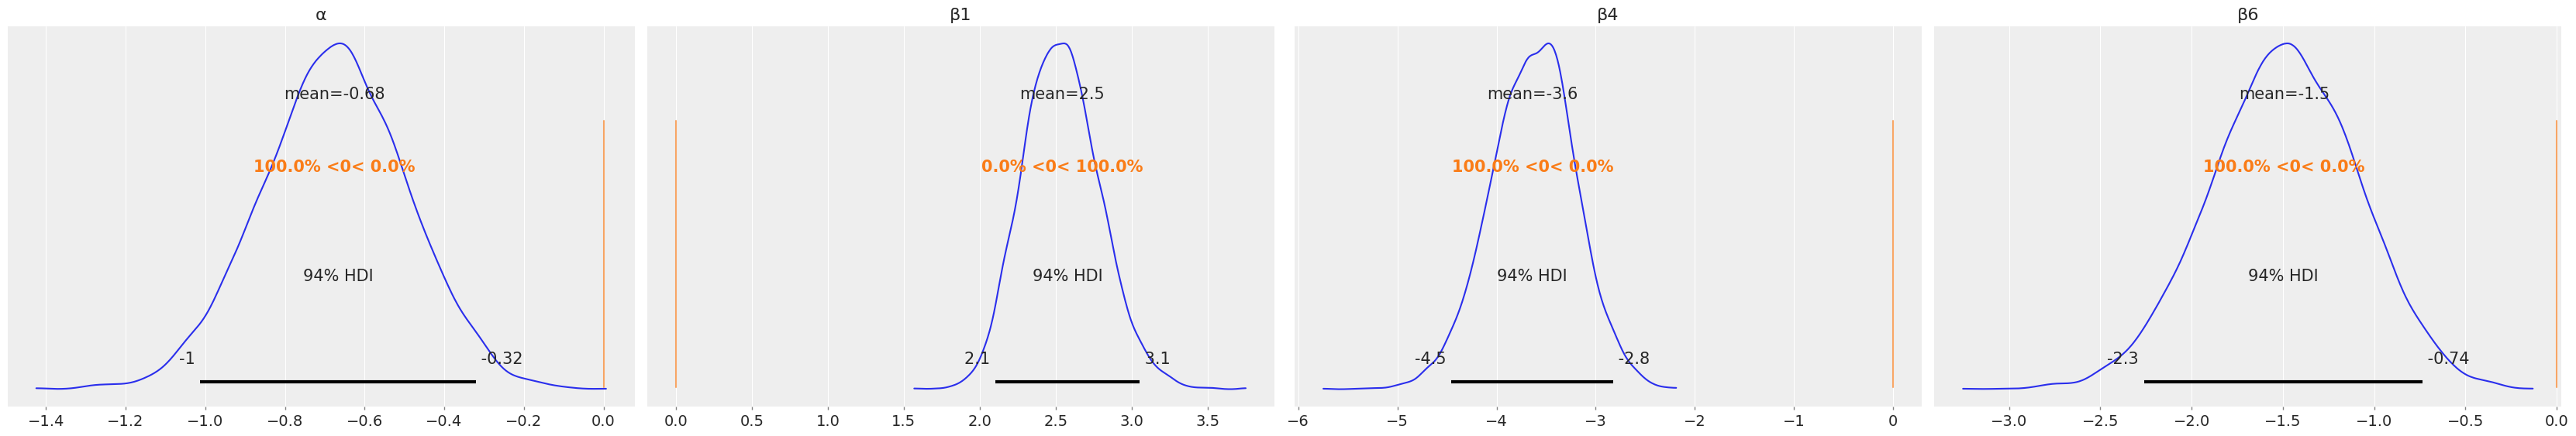

In [ ]:
az.plot_posterior(sleep_trace2,var_names=['α','β1','β4', 'β6'], ref_val = 0,);

IndexError: ignored

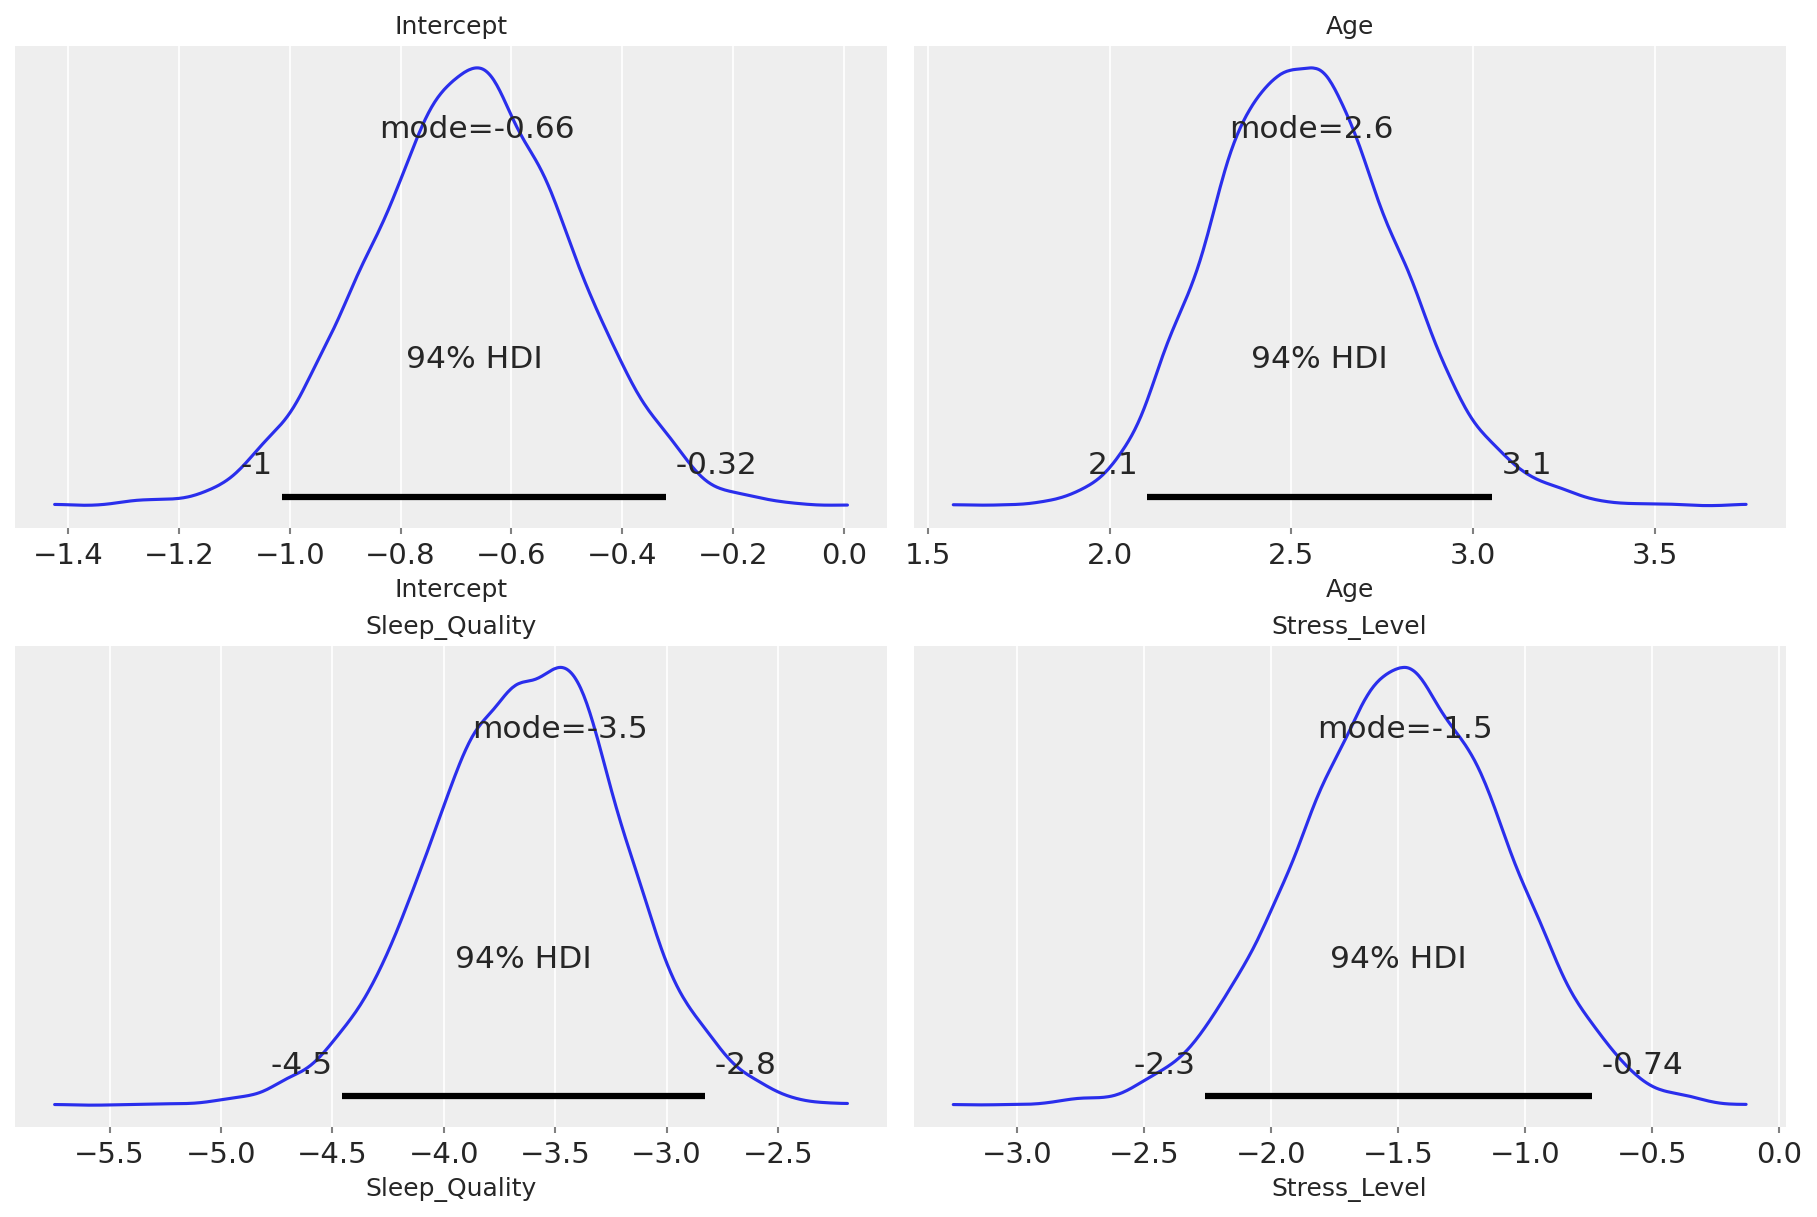

In [ ]:
# Plot posteriors with HDI and variable name

all_predictors = ['Age', 'Sleep_Quality', 'Stress_Level']
parameters = ['α','β1','β4', 'β6']

fig, axes = plt.subplots(2,2, figsize=(12,8), dpi=150)
for ax, estimate, title, xlabel in zip(fig.axes,
                                      (sleep_trace2.posterior[i] for i in parameters),
                                       ['Intercept'] + all_predictors,
                                        ['Intercept'] + all_predictors):
    pm.plot_posterior(estimate, point_estimate='mode', ax=ax)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=12)

fig.delaxes(axes[2,1])
plt.tight_layout()

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

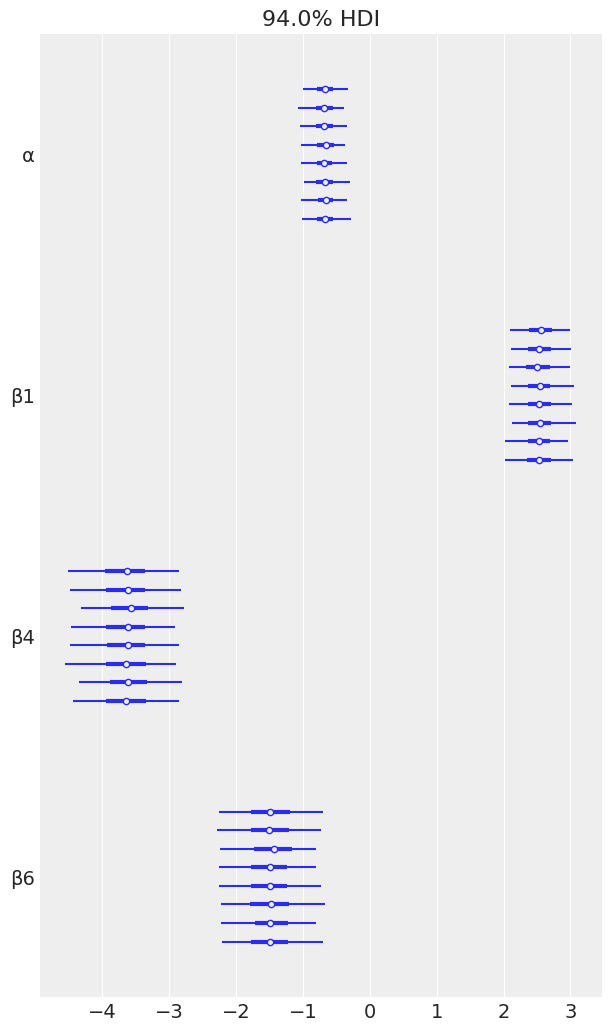

In [ ]:
# forest plot
az.plot_forest(sleep_trace2, var_names=['α','β1','β4', 'β6'])

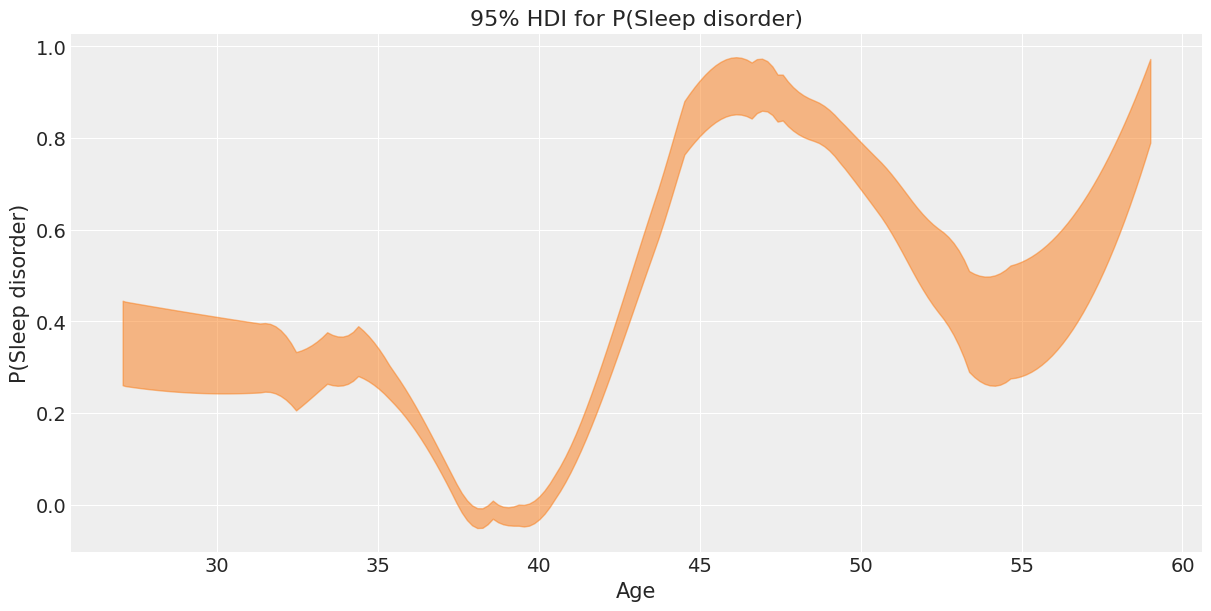

In [ ]:
#uncertainity for age
_, ax = plt.subplots(figsize=(12, 6))
rates = sleep_trace2.posterior["p"]
az.plot_hdi(sleep_no_scale['Age'], rates, smooth=True, hdi_prob=0.95)
rate_mean = sleep_trace2.posterior["p"].mean(dim=["draw", "chain"])
ax.set_title("95% HDI for P(Sleep disorder)")
ax.set_xlabel("Age")
ax.set_ylabel("P(Sleep disorder)");

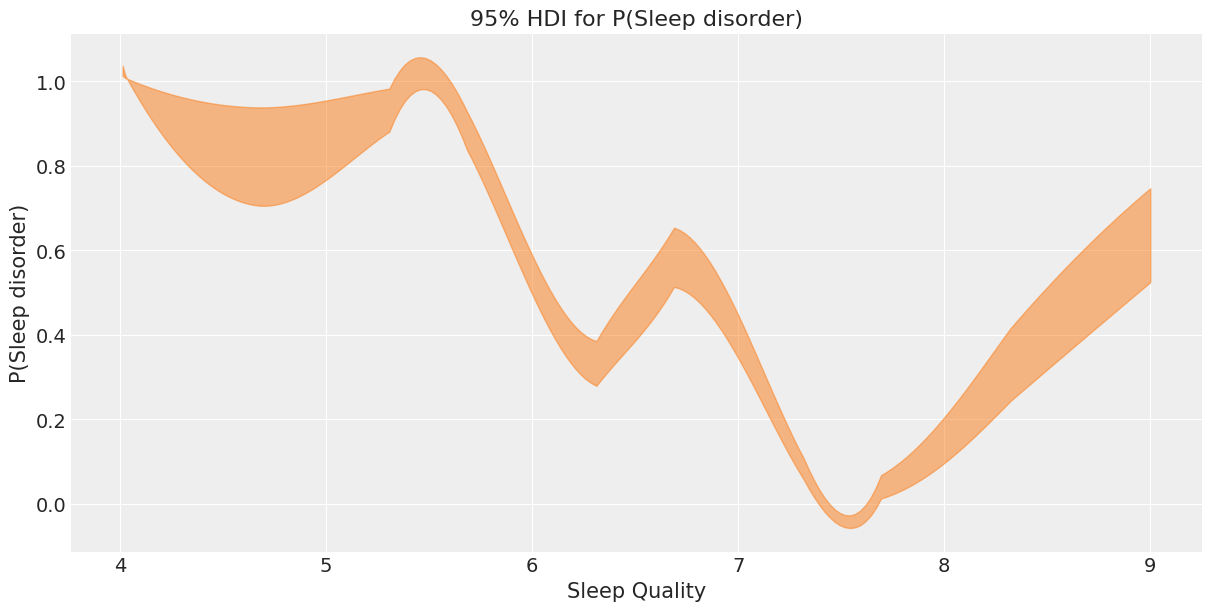

In [ ]:
#uncertainity for sleep
_, ax = plt.subplots(figsize=(12, 6))
rates = sleep_trace2.posterior["p"]
az.plot_hdi(sleep_no_scale['Sleep_Quality'], rates, smooth=True, hdi_prob=0.95)
rate_mean = sleep_trace2.posterior["p"].mean(dim=["draw", "chain"])
ax.set_title("95% HDI for P(Sleep disorder)")
ax.set_xlabel("Sleep Quality")
ax.set_ylabel("P(Sleep disorder)");

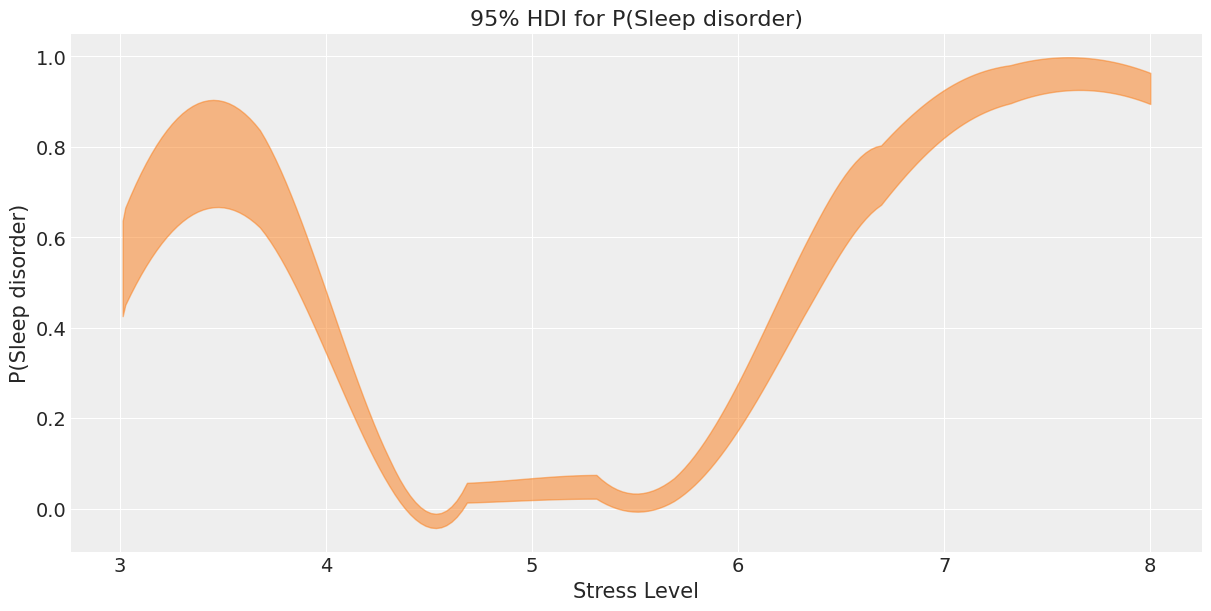

In [ ]:
#uncertainity for stress
_, ax = plt.subplots(figsize=(12, 6))
rates = sleep_trace2.posterior["p"]
az.plot_hdi(sleep_no_scale['Stress_Level'], rates, smooth=True, hdi_prob=0.95)
rate_mean = sleep_trace2.posterior["p"].mean(dim=["draw", "chain"])
ax.set_title("95% HDI for P(Sleep disorder)")
ax.set_xlabel("Stress Level")
ax.set_ylabel("P(Sleep disorder)");

# **6. Bayesian Model Averaging Approach**
### *Two models (Main Effect and Simpler models) were compared based on WAIC and LOO values.*


---
### *In terms of model comparison with ROC-AUC curve, the AUC values and the plots were applied to assess the models' ability to distinguish between the binary classes.*


---
### *Using the Weighted Akaike Information Criterion (WAIC) values as weights, predictions from both  main effects and simpler models were combined and created Bayesian Model Averaging (BMA). Then, we made a comparison and compare their HDI widths and means among the three models.*


In [ ]:
sleep_trace2 = pm.to_inference_data(trace=trace, model=simple_model,log_likelihood=True)

In [ ]:
az.waic(sleep_trace2)

Computed from 2000 posterior samples and 374 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -125.04    12.97
p_waic        4.01        -

In [ ]:
az.loo(sleep_trace2)

Computed from 2000 posterior samples and 374 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -125.06    12.97
p_loo        4.02        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      374  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [ ]:
az.waic(sleep_trace)

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 8000 posterior samples and 374 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -119.83    15.09
p_waic       14.15        -

There has been a warning during the calculation. Please check the results.

In [ ]:
az.loo(sleep_trace)

Computed from 8000 posterior samples and 374 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -120.03    15.12
p_loo       14.35        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      374  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [ ]:
cmp_waic = az.compare({'main_model':sleep_trace, 'simple_model':sleep_trace2}, ic='waic')
cmp_waic

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


rank   elpd_waic     p_waic  elpd_diff    weight         se  \
main_model       0 -119.833132  14.153769   0.000000  0.677295  15.086253   
simple_model     1 -125.041895   4.009338   5.208763  0.322705  12.971964   

                   dse  warning scale  
main_model    0.000000     True   log  
simple_model  6.234593    False   log

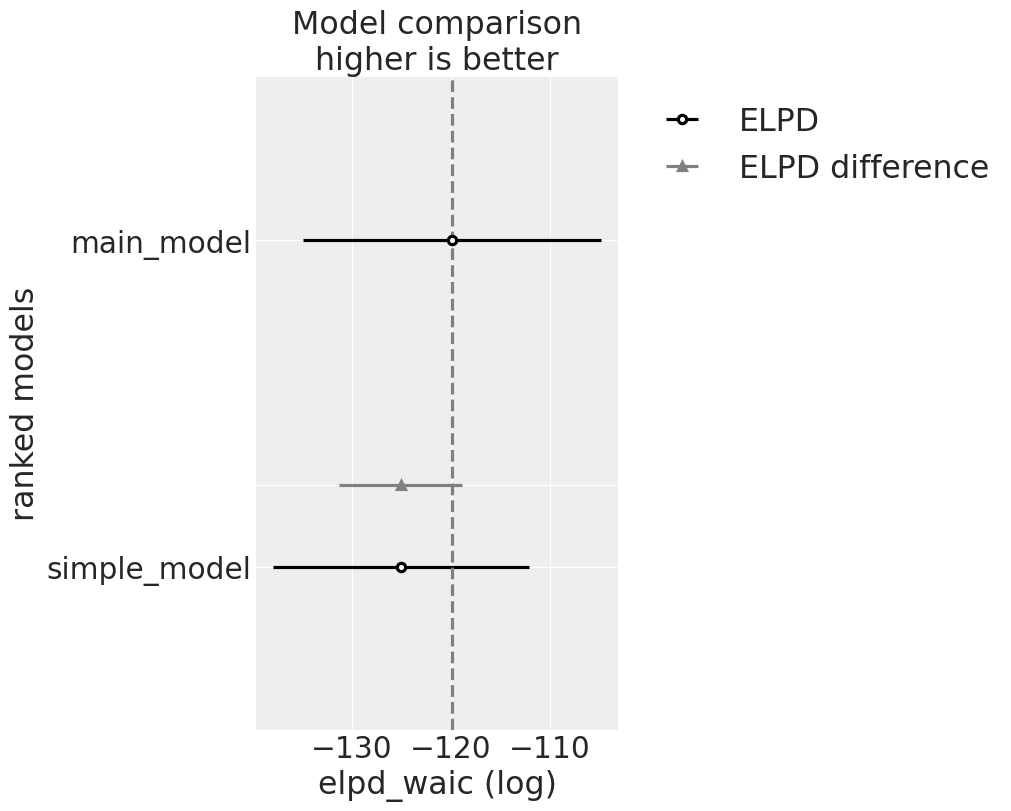

In [ ]:
az.plot_compare(cmp_waic, figsize = (10,8));


In [ ]:
cmp_loo = az.compare({'main_model':sleep_trace, 'simple_model':sleep_trace2}, ic='loo')
cmp_loo

rank    elpd_loo      p_loo  elpd_diff    weight         se  \
main_model       0 -120.026625  14.347262   0.000000  0.672631  15.117551   
simple_model     1 -125.057167   4.024610   5.030542  0.327369  12.974037   

                   dse  warning scale  
main_model    0.000000    False   log  
simple_model  6.246271    False   log

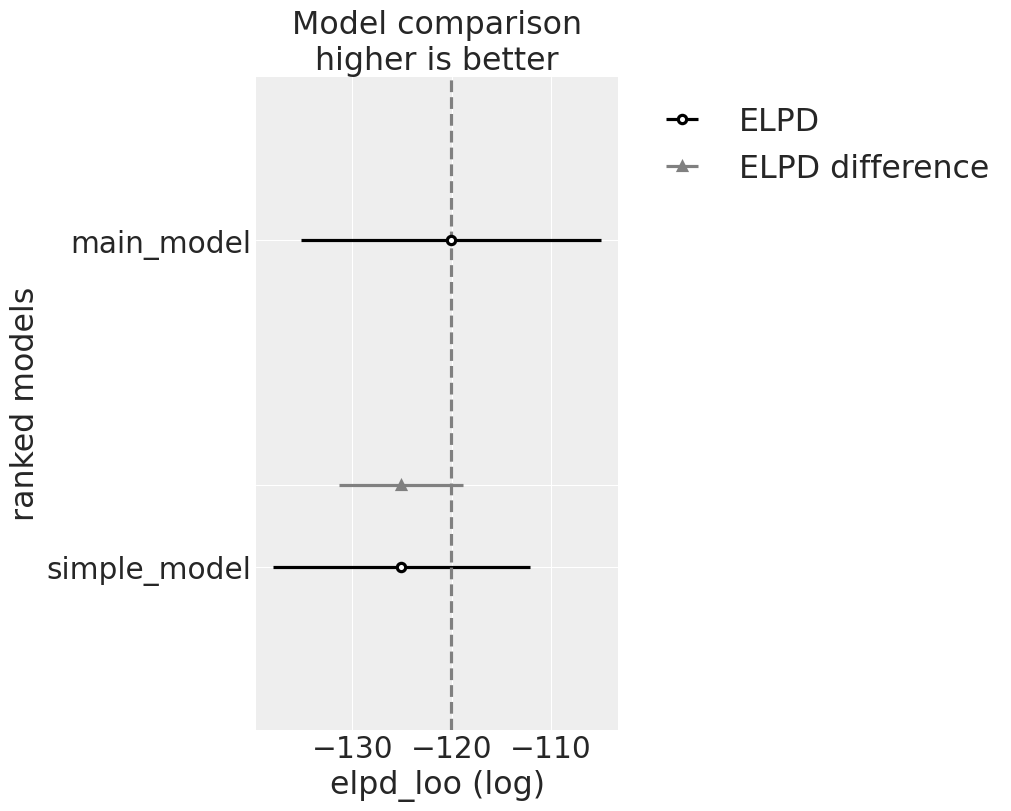

In [ ]:
az.plot_compare(cmp_loo, figsize = (10,8));


In [ ]:
# setting weights

w = cmp_waic.loc['main_model','weight']
weights = [w, 1-w]

In [ ]:
'''
traces = [sleep_trace, sleep_trace2]

weights = comp.weight.sort_index(ascending=True).values

ppc_combined = []

for model, trace in zip([main_eff_model, simple_model], traces):
    ppc_samples = pm.sample_posterior_predictive(model=model, trace=trace)

    ppc_samples = ppc_samples.posterior_predictive["Y1"]

    ppc_samples = np.array(ppc_samples, dtype=float)

    weighted_samples = np.zeros_like(ppc_samples)

    for i in range(len(weights)):
        weighted_samples[i] = ppc_samples[i] * weights[i]

    ppc_combined.append(weighted_samples)

ppc_combined = np.array(ppc_combined)
'''


'\ntraces = [sleep_trace, sleep_trace2]\n\nweights = comp.weight.sort_index(ascending=True).values\n\nppc_combined = []\n\nfor model, trace in zip([main_eff_model, simple_model], traces):\n    ppc_samples = pm.sample_posterior_predictive(model=model, trace=trace)\n\n    ppc_samples = ppc_samples.posterior_predictive["Y1"]\n\n    ppc_samples = np.array(ppc_samples, dtype=float)\n\n    weighted_samples = np.zeros_like(ppc_samples)\n\n    for i in range(len(weights)):\n        weighted_samples[i] = ppc_samples[i] * weights[i]\n\n    ppc_combined.append(weighted_samples)\n\nppc_combined = np.array(ppc_combined)\n'

In [ ]:
predictions_model1 = sleep_pp.posterior_predictive['Y1'].values
predictions_model2 = sleep_pp2.posterior_predictive['Y1'].values

predictions_model1 = predictions_model1.reshape(-1, 1)
predictions_model2 = predictions_model2.reshape(-1, 1)

predictions_model1 = predictions_model1.ravel()
predictions_model2 = predictions_model1.ravel()

In [ ]:
weighted_predictions = weights[0] * predictions_model1 + weights[1] * predictions_model2

In [ ]:
weighted_predictions

array([1., 0., 0., ..., 1., 1., 1.])

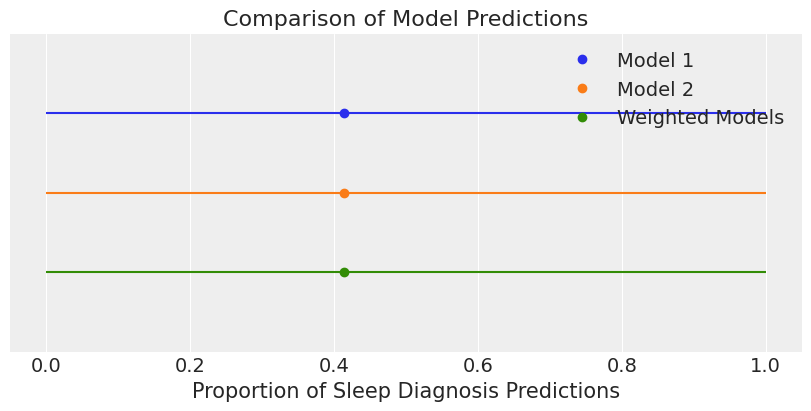

In [ ]:
# Calculate means (proportions of 1s)
mean_model1 = predictions_model1.mean()
mean_model2 = predictions_model2.mean()
mean_weighted = weighted_predictions.mean()

# Calculate HDIs
hpd_model1 = az.hdi(predictions_model1, hdi_prob=0.95)
hpd_model2 = az.hdi(predictions_model2, hdi_prob=0.95)
hpd_weighted = az.hdi(weighted_predictions, hdi_prob=0.95)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(mean_model1, 2, "C0o", label="Model 1")
plt.hlines(2, *hpd_model1, "C0")
plt.plot(mean_model2, 1, "C1o", label="Model 2")
plt.hlines(1, *hpd_model2, "C1")
plt.plot(mean_weighted, 0, "C2o", label="Weighted Models")
plt.hlines(0, *hpd_weighted, "C2")

plt.yticks([])
plt.ylim(-1, 3)
plt.xlabel("Proportion of Sleep Diagnosis Predictions")
plt.legend()
plt.title("Comparison of Model Predictions")
plt.show()

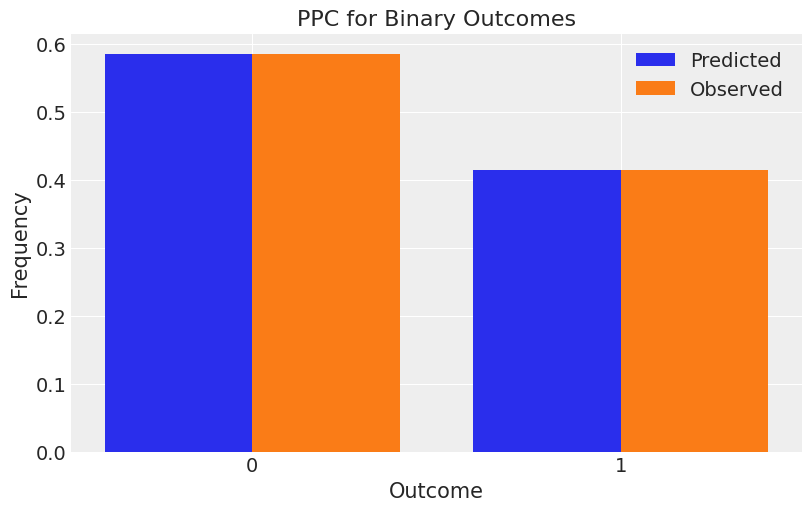

In [ ]:
observed_data = df['Sleep_Disorder']
pred_freq = [np.mean(weighted_predictions == 0), np.mean(weighted_predictions == 1)]
obs_freq = [np.mean(observed_data == 0), np.mean(observed_data == 1)]

# Indices for group bars
indices = np.arange(len(pred_freq))

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(indices - 0.2, pred_freq, 0.4, label='Predicted')
plt.bar(indices + 0.2, obs_freq, 0.4, label='Observed')

plt.xticks(indices, ['0', '1'])
plt.ylabel('Frequency')
plt.xlabel('Outcome')
plt.title('PPC for Binary Outcomes')
plt.legend()
plt.show()

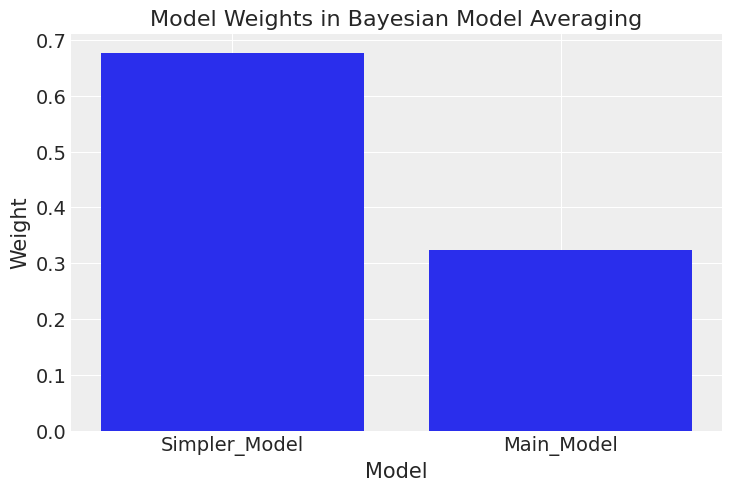

In [ ]:
model_names = ['Simpler_Model', 'Main_Model']
model_weights = [weights[0], weights[1]]
plt.bar(model_names, model_weights)
plt.xlabel('Model')
plt.ylabel('Weight')
plt.title('Model Weights in Bayesian Model Averaging')
plt.show()

In [ ]:
# ROC for main model

X = df.iloc[:,:10].to_numpy()
y = df["Sleep_Disorder"].to_numpy()

In [ ]:
 # Split the data to get out of sample with frac = fraction in test set
frac = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=frac,random_state=random_seed)


In [ ]:
# training data
with pm.Model() as main_model_roc:
    X = pm.MutableData("X", X_train[:, :-1])
    y = pm.MutableData("y", y_train)

    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=10, shape=(X_train.shape[1] - 1,))  # Use a vector for β

    mu_x = α + pm.math.dot(X, β)
    p = pm.Deterministic('p', pm.invlogit(mu_x))

    Y1 = pm.Bernoulli('Y1', p=p, observed=y)

    main_roc_trace = pm.sample(random_seed=random_seed, cores=8)





In [ ]:
# Test data predictions
with main_model_roc:
    # Test data
    pm.set_data({"X": X_test[:, :-1]})
    # Predict outcomes & probabilities
    main_test_pp = pm.sample_posterior_predictive(
        main_roc_trace,
        var_names=["p"],
        return_inferencedata=True,
        predictions=True,
        extend_inferencedata=True,
        random_seed=random_seed)




In [ ]:
# Compute the point prediction by taking the mean

threshold = 0.5
mean_pred = main_test_pp.predictions["p"].mean(dim=["chain", "draw"])
y_test_pred = (mean_pred >= threshold).astype("int")

In [ ]:
# Accuraccy - NOTE!! Not useful for unbalanced data
print(f"accuracy = {accuracy_score(y_true=y_test, y_pred=y_test_pred): 0.3f}")

accuracy =  0.907


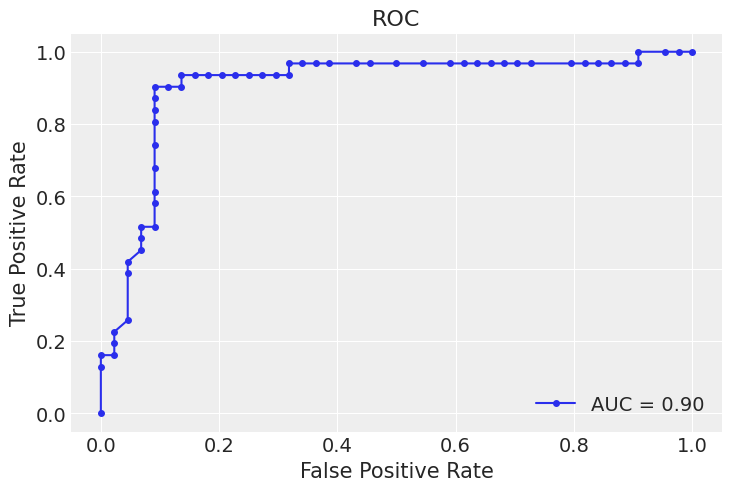

In [ ]:
fpr, tpr, thresholds = roc_curve(
y_true=y_test, y_score=mean_pred, pos_label=1, drop_intermediate=False
)
roc_auc = auc(fpr, tpr)
fig, ax = plt.subplots()
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display = roc_display.plot(ax=ax, marker="o", markersize=4)
ax.set(title="ROC");


In [ ]:
# ROC for simpler model

X = df[["Age", "Sleep_Quality", "Stress_Level"]].to_numpy()
y = df["Sleep_Disorder"].to_numpy()

In [ ]:
# Split the data to get out of sample with frac = fraction in test set
frac = 0.2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=frac, random_state=random_seed)

In [ ]:
# training data
with pm.Model() as simpler_model_roc:
  X = pm.MutableData("X", X_train) # training data
  y = pm.MutableData("y", y_train)

  α = pm.Normal('α', mu=0, sigma=10)
  β1 = pm.Normal('β1', mu=0, sigma=10)
  β4 = pm.Normal('β4', mu=0, sigma=10)
  β6 = pm.Normal('β6', mu=0, sigma=10)

  #mu = α+β1*df["Age"]+β4*df["Sleep_Quality"]+β6*df["Stress_Level"]
  mu_x = α+1*X[:,0]+2*X[:,1]+3*X[:,2]
  p = pm.Deterministic('p', pm.invlogit(mu_x))

  Y1 = pm.Bernoulli('Y1', p=p, observed=y)

  simpler_roc_trace = pm.sample( random_seed = random_seed, cores = 8)




In [ ]:
# Test data predictions
with simpler_model_roc:
  # Test data
  pm.set_data({"X": X_test})
  #Predict outcomes & probabilities
  simple_test_pp = pm.sample_posterior_predictive(
    simpler_roc_trace,
    var_names = ["p"],
    return_inferencedata=True,
    predictions=True,
    extend_inferencedata=True,
    random_seed = random_seed)


In [ ]:
# Compute the point prediction by taking the mean

threshold = 0.5
mean_pred = simple_test_pp.predictions["p"].mean(dim=["chain", "draw"])
y_test_pred = (mean_pred >= threshold).astype("int")


In [ ]:
# Accuraccy - NOTE!! Not useful for unbalanced data
print(f"accuracy = {accuracy_score(y_true=y_test, y_pred=y_test_pred): 0.3f}")

accuracy =  0.707


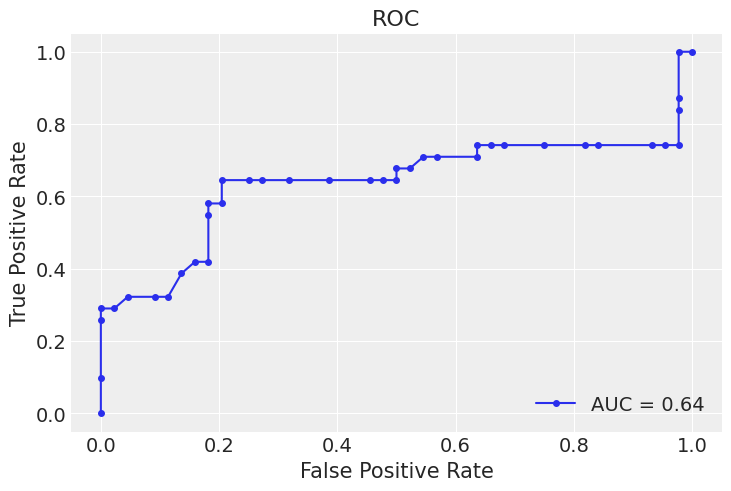

In [ ]:
fpr, tpr, thresholds = roc_curve(
y_true=y_test, y_score=mean_pred, pos_label=1, drop_intermediate=False
)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots()
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display = roc_display.plot(ax=ax, marker="o", markersize=4)
ax.set(title="ROC");
